In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter
from typing import List
import matplotlib.gridspec as gridspec
import jovian
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize'] = (10,8)
pd.set_option('display.max_columns', None)

<IPython.core.display.Javascript object>

In [2]:
dataset_url = "https://www.kaggle.com/datasets/abhisheksjha/time-series-air-quality-data-of-india-2010-2023"
data_folder = "time-series-air-quality-data-of-india-2010-2023/"

In [5]:
stations_df = pd.read_csv(data_folder + "stations_info.csv", header = 0)

In [7]:
total_number_of_files = len(stations_df['file_name'].unique())
total_number_of_files

453

In [9]:
cities, states = stations_df['city'].unique()[:100], stations_df['state'].unique()

In [13]:
def create_worldcloud(words_list:List, type_of_words:str):
    
    """
    Creating a wordcloud for cities and states for attractive visualization
    """
    word_cloud_lst = Counter(words_list)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(word_cloud_lst)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("The Air Quality Information Is Available for these " + type_of_words)
    plt.axis("off")
    plt.show()
    return

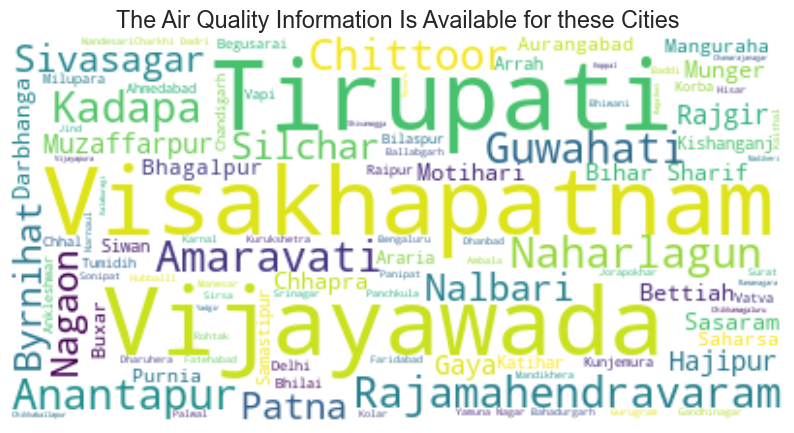

In [15]:
create_worldcloud(cities, 'Cities')

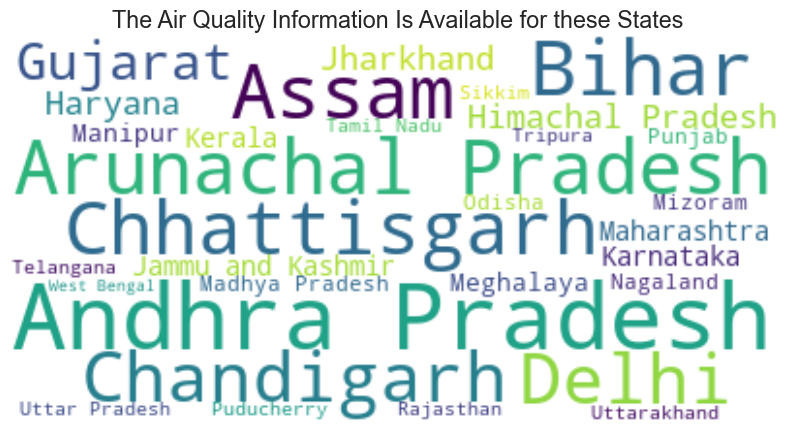

In [17]:
create_worldcloud(states, 'States')

In [19]:
pd.options.display.max_colwidth = 100
params = [
    ['PM10', 'Particulate Matter 10', 'Fine particles with diameter ≤ 10 micrometers in the air', 'ug/m3'],
    ['PM2.5', 'Particulate Matter 2.5', 'Fine particles with diameter ≤ 2.5 micrometers in the air', 'ug/m3'],
    ['CO', 'Carbon Monoxide', 'Colorless, odorless gas from incomplete combustion of carbon', 'mg/Nm3, mg/m3, ng/m3, ug/m3'],
    ['CO2', 'Carbon Dioxide', 'Greenhouse gas produced by combustion and other processes', 'mg/m3'],
    ['NO', 'Nitric Oxide', 'Gas produced by combustion processes', 'mg/m3, ppb, ppm, ug/m3'],
    ['NO2', 'Nitrogen Dioxide', 'Reddish-brown gas formed by oxidation of nitric oxide', 'ug/m3'],
    ['NOx', 'Nitrogen Oxides', 'Mixture of nitric oxide (NO) and nitrogen dioxide (NO2)', 'ppb, ppm, ug/m3'],
    ['NH3', 'Ammonia', 'Colorless gas with a pungent odor', 'ppb, ug/m3'],
    ['SO2', 'Sulfur Dioxide', 'Gas formed by burning sulfur-containing fossil fuels', 'ug/m3'],
    ['Temp', 'Temperature', 'Degree of hotness or coldness of the air', 'degrees Celsius'],
    ['AT', 'Air Temperature', 'Temperature of the air in the surrounding environment', 'degrees Celsius'],
    ['BP', 'Barometric Pressure', 'Atmospheric pressure exerted by the weight of the air', 'W/mt2, mg/m3, mmHg'],
    ['Benzene', 'Concentration of Benzene', 'Presence of Benzene in the air', 'mg/m3, ug/m3'],
    ['CH4', 'Methane', 'Colorless, odorless gas and primary component of natural gas', 'ug/m3'],
    ['Eth-Benzene', 'Concentration of Ethylbenzene', 'Presence of Ethylbenzene in the air', 'ug/m3'],
    ['Gust', 'Wind Gust', 'Sudden, brief increase in wind speed', 'kl/h, km/hr, m/s'],
    ['HCHO', 'Formaldehyde', 'Colorless gas with a strong odor', 'ug/m3'],
    ['Hg', 'Mercury', 'Toxic heavy metal present in the air', 'ug/m3'],
    ['MH', 'Mixing Height', 'Vertical extent of the well-mixed atmospheric layer', 'meters (m)'],
    ['MP-Xylene', 'Concentration of Meta-Para Xylene', 'Presence of Meta-Para Xylene in the air', 'ug/m3'],
    ['NMHC', 'Non-Methane Hydrocarbons', 'Total amount of hydrocarbons excluding methane in the air', 'ug/m3'],
    ['O Xylene', 'Concentration of Ortho-Xylene', 'Presence of Ortho-Xylene in the air', 'ug/m3'],
    ['Ozone', 'Ozone Concentration', 'Presence of ozone in the air', 'ppb, ug/m3'],
    ['Power', 'Power Consumption', 'Amount of electrical power being consumed', 'Watts (W)'],
    ['RF', 'Rainfall', 'Amount of precipitation in the form of rain', 'm/s, mm'],
    ['RH', 'Relative Humidity', 'Amount of moisture in the air relative to its capacity', '%, W/mt2, degree'],
    ['SPM', 'Suspended Particulate Matter', 'Solid or liquid particles suspended in the air', 'ug/m3'],
    ['SR', 'Solar Radiation', 'Energy received from the sun', 'W/mt2, ug/m3'],
    ['THC', 'Total Hydrocarbons', 'Total amount of hydrocarbon compounds in the air', 'ug/m3'],
    ['Toluene', 'Concentration of Toluene', 'Presence of Toluene in the air', 'ug/m3'],
    ['VWS', 'Wind Speed', 'Speed of horizontal air movement', 'degree, m/s'],
    ['Variance', 'Variance', 'Measure of the spread between numbers in a dataset', 'n'],
    ['WD', 'Wind Direction', 'Direction from which the wind is blowing', 'deg, degree C, degree'],
    ['WS', 'Wind Speed', 'Speed of air movement', 'm/s, ug/m3'],
    ['Xylene', 'Concentration of Xylene', 'Presence of Xylene in the air', 'ug/m3']
]

params_df = pd.DataFrame(params, columns=['Abbreviation', 'Feature', 'Definition', 'Measurement Units'])
display(params_df)

Abbreviation                            Feature  \
0          PM10              Particulate Matter 10   
1         PM2.5             Particulate Matter 2.5   
2            CO                    Carbon Monoxide   
3           CO2                     Carbon Dioxide   
4            NO                       Nitric Oxide   
5           NO2                   Nitrogen Dioxide   
6           NOx                    Nitrogen Oxides   
7           NH3                            Ammonia   
8           SO2                     Sulfur Dioxide   
9          Temp                        Temperature   
10           AT                    Air Temperature   
11           BP                Barometric Pressure   
12      Benzene           Concentration of Benzene   
13          CH4                            Methane   
14  Eth-Benzene      Concentration of Ethylbenzene   
15         Gust                          Wind Gust   
16         HCHO                       Formaldehyde   
17           Hg                            Mercury   
18           MH                      Mixing Height   
19    MP-Xylene  Concentration of Meta-Para Xylene   
20         NMHC           Non-Methane Hydrocarbons   
21     O Xylene      Concentration of Ortho-Xylene   
22        Ozone                Ozone Concentration   
23        Power                  Power Consumption   
24           RF                           Rainfall   
25           RH                  Relative Humidity   
26          SPM       Suspended Particulate Matter   
27           SR                    Solar Radiation   
28          THC                 Total Hydrocarbons   
29      Toluene           Concentration of Toluene   
30          VWS                         Wind Speed   
31     Variance                           Variance   
32           WD                     Wind Direction   
33           WS                         Wind Speed   
34       Xylene            Concentration of Xylene   

                                                      Definition  \
0       Fine particles with diameter ≤ 10 micrometers in the air   
1      Fine particles with diameter ≤ 2.5 micrometers in the air   
2   Colorless, odorless gas from incomplete combustion of carbon   
3      Greenhouse gas produced by combustion and other processes   
4                           Gas produced by combustion processes   
5          Reddish-brown gas formed by oxidation of nitric oxide   
6        Mixture of nitric oxide (NO) and nitrogen dioxide (NO2)   
7                              Colorless gas with a pungent odor   
8           Gas formed by burning sulfur-containing fossil fuels   
9                       Degree of hotness or coldness of the air   
10         Temperature of the air in the surrounding environment   
11         Atmospheric pressure exerted by the weight of the air   
12                                Presence of Benzene in the air   
13  Colorless, odorless gas and primary component of natural gas   
14                           Presence of Ethylbenzene in the air   
15                          Sudden, brief increase in wind speed   
16                              Colorless gas with a strong odor   
17                          Toxic heavy metal present in the air   
18           Vertical extent of the well-mixed atmospheric layer   
19                       Presence of Meta-Para Xylene in the air   
20     Total amount of hydrocarbons excluding methane in the air   
21                           Presence of Ortho-Xylene in the air   
22                                  Presence of ozone in the air   
23                     Amount of electrical power being consumed   
24                   Amount of precipitation in the form of rain   
25        Amount of moisture in the air relative to its capacity   
26                Solid or liquid particles suspended in the air   
27                                  Energy received from the sun   
28              Total amount of hydrocarbon compounds in the air   
29                

In [21]:
def state_dataframe(state_name):
    
    """
    This function returns a subset dataframe from stations_df given name of state
    """
    
    state_mask = (stations_df['state'] == state_name)
    state_df = stations_df[state_mask]
    
    return state_df

def get_columns_with_word(df_columns, words):
    """
    Get the columns in a dataframe that contain one or more specific words
    This is to handle information provided in multiple units
    """
    columns_with_word = []
    
    # Convert words to a list if it's not already
    if not isinstance(words, list):
        words = [words]
    
    for col in df_columns:
        for word in words:
            if word.lower() in col.lower():
                columns_with_word.append(col)
                break
    
    return columns_with_word

def read_dataframe(file:str, col:List):
    
    """
    Given list of columns and file name, it returns the read csv file as dataframe
    """
    
    df = pd.read_csv(file, header=0)
    common_columns = set(col) & set(df.columns)
    if len(common_columns) > 0:
        df = df[list(common_columns)]
        return df
    else:
        return None

In [23]:
def create_date_feature(data):
    
    """
    Set From Date column as datetime feature and remove To Date column
    """
    
    data['From Date'] = pd.to_datetime(data['From Date'])
    data.rename(columns = {"From Date":"Date"}, inplace = True)
    
    return data

def aggregate_hourly_to_daily(data):
    
    """
    Given dataframe data, aggregate hourly to daily
    """
    
    # Convert the 'Date' column to datetime type
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Set the 'Date' column as the index
    data.set_index('Date', inplace=True)
    
    # Resample the data to daily frequency and calculate the mean for each day
    daily_data = data.resample('D').mean()
    
    # Reset the index to have a 'Date' column again
    daily_data.reset_index(inplace=True)
    
    return daily_data

def level_of_pollutant_severity(data):
    """
    Categorize pollutant levels into different severity levels based on predefined thresholds.
    """
    
    # Define the bins and labels for the categories
    pm_ozone_bins = [0, 50, 100, 150, 200, 300, np.inf]
    co_bins = [0, 1, 5, 10, 35, 100, np.inf]
    so2_bins = [0, 50, 150, 350, 500, 1000, np.inf]
    labels = ['safe', 'acceptable', 'elevated', 'high', 'very high', 'dangerous']
    
    no2_bins = [0, 40, 80, 120, 200, np.inf]
    no2_labels = ['safe', 'acceptable', 'high', 'very high', 'dangerous']

    # Create the new columns based on the condition
    data['PM2.5_cat'] = pd.cut(data['PM2.5'], bins=pm_ozone_bins, labels=labels)
    data['PM10_cat'] = pd.cut(data['PM10'], bins=pm_ozone_bins, labels=labels)
    data['ozone_cat'] = pd.cut(data['Ozone'], bins=pm_ozone_bins, labels=labels)
    data['CO_cat'] = pd.cut(data['CO'], bins=co_bins, labels=labels)
    data['SO2_cat'] = pd.cut(data['SO2'], bins=so2_bins, labels=labels)
    
    data['no2_cat'] = pd.cut(data['NO2'], bins=no2_bins, labels=no2_labels)
    
    return data

In [25]:
def remove_outliers(data, cols):
    
    """
    Removing outliers from a dataset helps to mitigate the influence of extreme values, 
    ensuring that the analysis and modeling are not unduly skewed by these atypical observations 
    """
     
    for col in cols:
        zscore = np.abs((data[col] - data[col].mean()) / data[col].std())
        zscore_thresh = 3
        data = data[(zscore <= zscore_thresh)].copy()
    
    data.dropna(inplace=True)
    return data

def check_year_info(data):
    
    """
    This function checks if we have continuous data for atleast 3 years
    """

    years = data['Date'].dt.year.unique()

    
    if len(years) < 4:
        return None
    
    return data

def groupby_date(data):
    
    """
    This function groups the data by date for cities with multiple stations
    I am assuming that a city should largely exhibit similar environmental conditions
    """
    
    data = data.groupby('Date').mean().reset_index()
    
    return data

In [27]:
states = ['Uttar Pradesh', 'Maharashtra', 'Bihar', 'West Bengal', 'Madhya Pradesh', 'Tamil Nadu', 
         'Rajasthan', 'Karnataka', 'Gujarat', 'Andhra Pradesh', 'Delhi']
def state_data_process_pipeline(feature_list:List):
    
    """
    Given Columns/Features process the data for all the states by using all the helper functions
    """
    
    state_data = {}
    
    for state_name in states:
        
        state_stations = state_dataframe(state_name) # getting subset of data_5years
        state_cities = state_stations.city.tolist() # cities in the state
        file_names = state_stations.file_name.tolist() # file names
        state_files = [data_folder + s + ".csv" for s in file_names] 

        city_data = {}

        for city,file in zip(state_cities, state_files):
            
            all_columns = pd.read_csv(file, header=0).columns
            features = get_columns_with_word(all_columns, feature_list)
            columns = ['From Date'] + features
            city_df = read_dataframe(file, columns) # reads the dataframe
            city_df = create_date_feature(city_df) # creates date features
            city_df = aggregate_hourly_to_daily(city_df) # aggregates hourly to daily information
            city_df = remove_outliers(city_df, features) # removing outliers
            city_df = check_year_info(city_df) # check continuity of data 
            
            if city_df is not None:
                city_df = city_df.dropna(subset=features, how='all') #remove rows where all values are Nan
                if city not in city_data:
                    city_data[city] = city_df
                else:
                    city_data[city] = pd.concat([city_data[city], city_df], ignore_index=True) # concatenate date for cities with multiple stations

                city_data[city] = groupby_date(city_data[city])

        processed_state_data = {key: value for key, value in city_data.items() if value is not None}  # remove any None values

        state_data[state_name] = processed_state_data
    
    return state_data

# Helper function to check if all columns are present, rename, and reorder all the columns in master_data
# This is for easy reference of column names

def rename_reorder_columns(master_data):
    """
    Rename and reorder the columns in the dataframes within the master_data dictionary.
    Remove cities that do not have the required columns.
    """
    updated_master_data = {}

    for state, cities in master_data.items():
        updated_cities = {}

        for city, df in cities.items():
            # Check if the required columns exist in the dataframe
            required_columns = ['Date', 'PM10 (ug/m3)', 'SO2 (ug/m3)', 'PM2.5 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'NO2 (ug/m3)']
            if set(required_columns).issubset(df.columns):
                # Rename the columns
                column_mapping = {
                    'PM10 (ug/m3)': 'PM10',
                    'SO2 (ug/m3)': 'SO2',
                    'PM2.5 (ug/m3)': 'PM2.5',
                    'CO (mg/m3)': 'CO',
                    'Ozone (ug/m3)': 'Ozone',
                    'NO2 (ug/m3)': 'NO2'
                }
                df.rename(columns=column_mapping, inplace=True)

                # Reorder the columns
                column_order = ['Date', 'PM2.5', 'PM10', 'Ozone', 'CO', 'SO2', 'NO2']
                df = df[column_order]

                # Reset the index
                df.reset_index(drop=True, inplace=True)

                # Add the updated dataframe to the updated_cities dictionary
                updated_cities[city] = df

        if updated_cities:
            # Add the updated cities to the updated_master_data dictionary
            updated_master_data[state] = updated_cities

    # Return the updated master_data dictionary
    return updated_master_data

In [29]:
master_data = state_data_process_pipeline(['pm','ozone','co','no2','so2'])

# Update the master_data with the renamed and reordered columns
master_data = rename_reorder_columns(master_data)

# Apply level_of_pollutant_severity function to all dataframes within master_data
for state, city_data in master_data.items():
    for city, df in city_data.items():
        master_data[state][city] = level_of_pollutant_severity(df)

# storing Delhi's information in a separate dictionary and deleting from master data
delhi_data = master_data['Delhi']
del master_data['Delhi']

In [30]:
def city_impact_pie_plot(master_data, col):
    
    """
    This function creates pie chart visualizations for each state and 
    contribution of pollution from each city (whose information is available) in the state
    """
    
    num_states = len(master_data)
    num_cols = 2
    num_rows = (num_states + 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))
    fig.suptitle("Pollution Impact - " + col + " - in Each State", y=1, fontsize=16)

    axes = axes.flatten()
    for i, (state, cities) in enumerate(master_data.items()):
        explode = [0.1] * len(cities)
        city_names_sorted = []
        impact_values_sorted = []

        for city, data in cities.items():
            impact = data[col].sum()
            city_names_sorted.append(city)
            impact_values_sorted.append(impact)

        city_names_sorted = [name for _, name in sorted(zip(impact_values_sorted, city_names_sorted))]
        impact_values_sorted = sorted(impact_values_sorted)

        axes[i].pie(impact_values_sorted, labels=city_names_sorted, explode=explode, autopct='%1.1f%%', startangle=30)
        axes[i].set_title(state, fontsize=15,y=1.05, fontweight='bold')

    # Remove unused subplots
    if num_states < num_cols * num_rows:
        for j in range(num_states, num_cols * num_rows):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

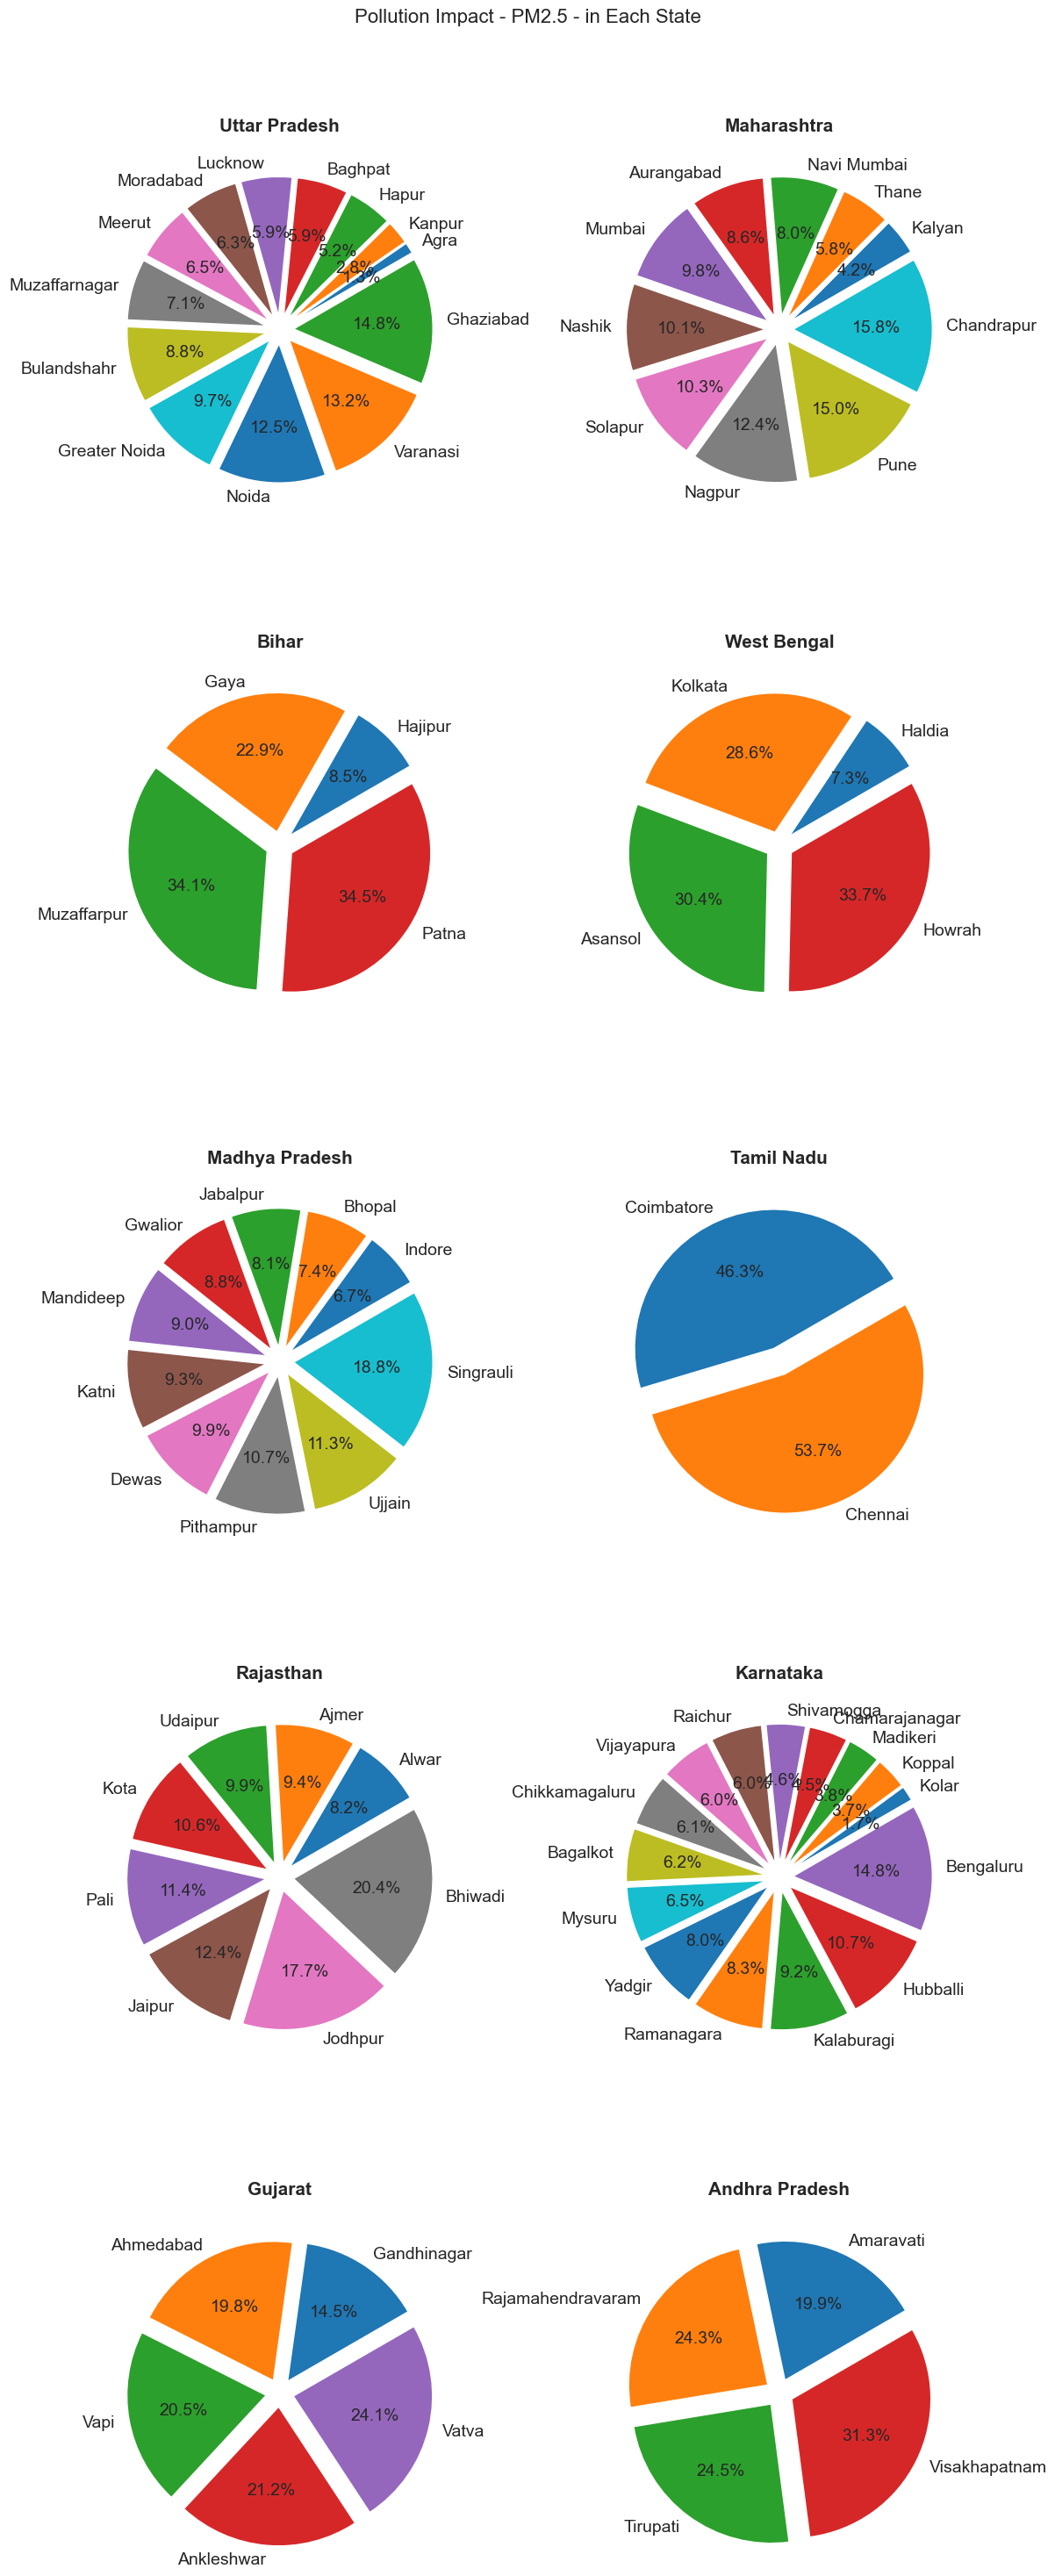

In [31]:
city_impact_pie_plot(master_data, 'PM2.5')

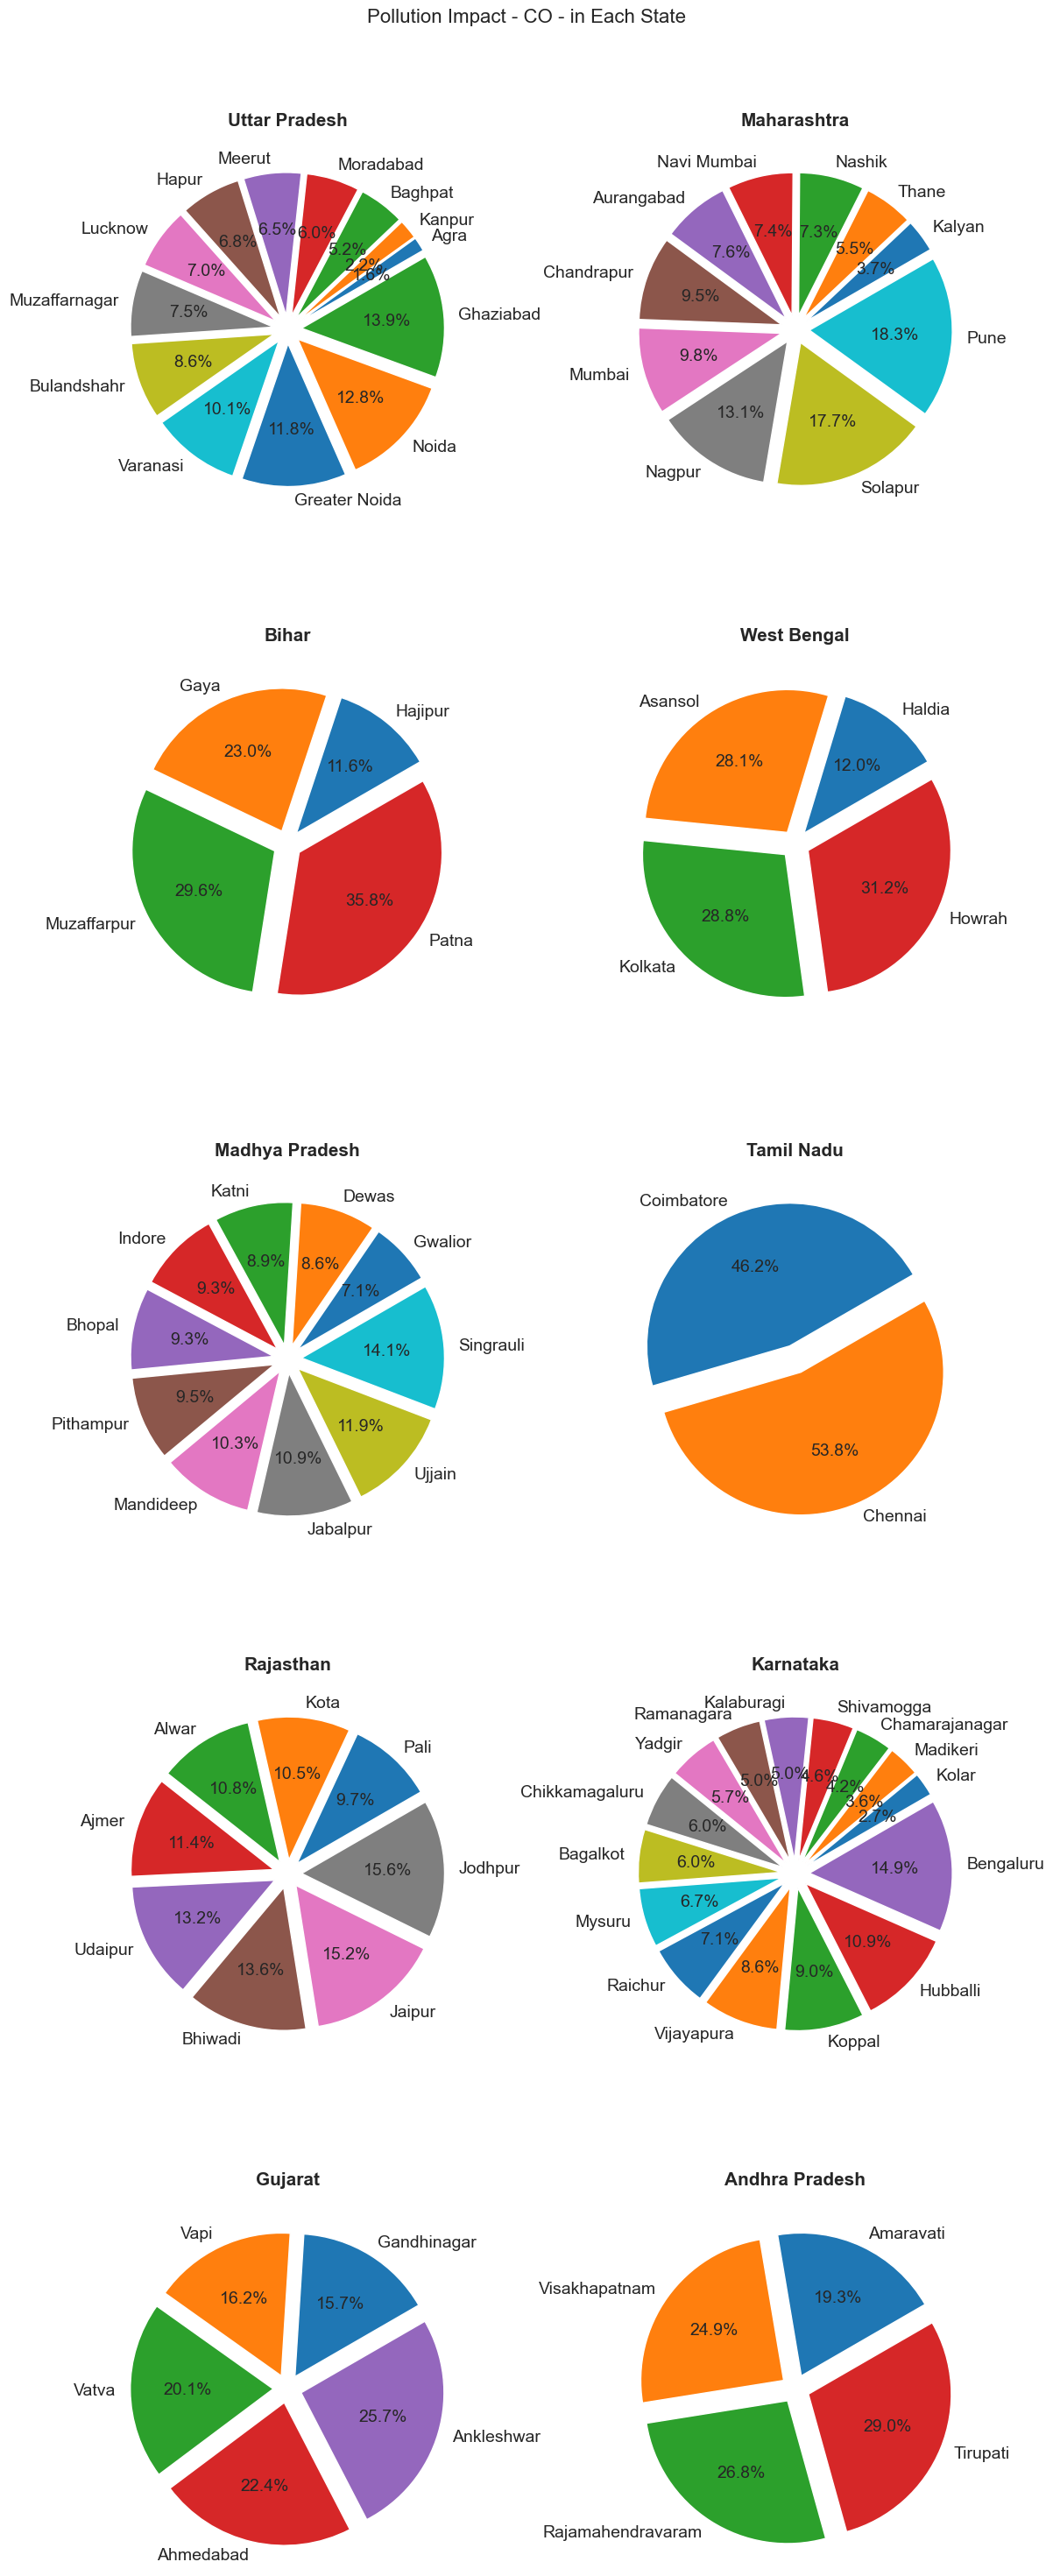

In [35]:
city_impact_pie_plot(master_data, 'CO')

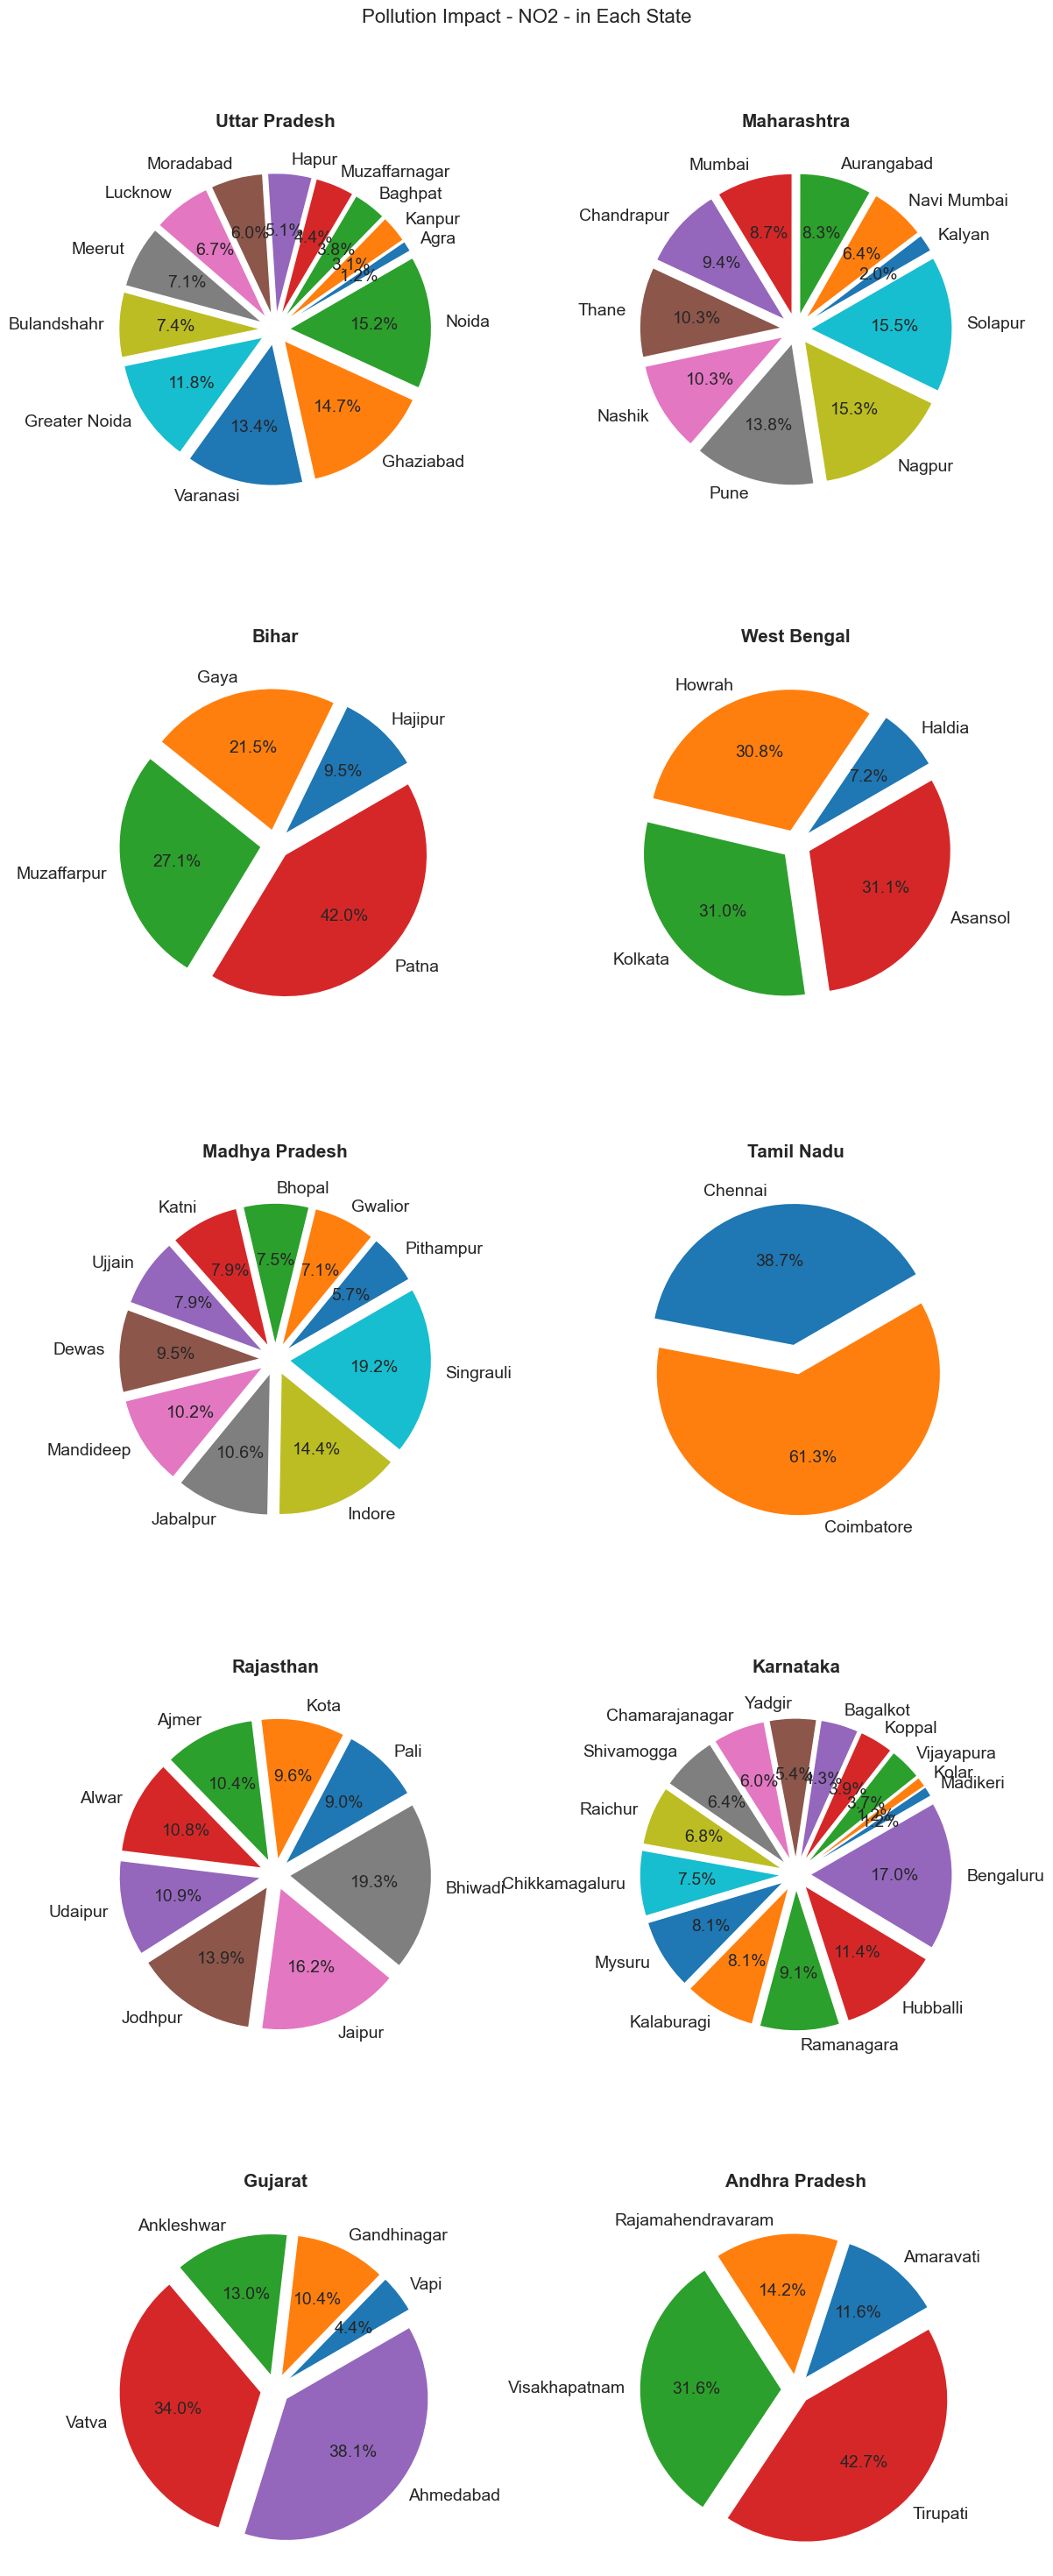

In [37]:
city_impact_pie_plot(master_data, 'NO2')

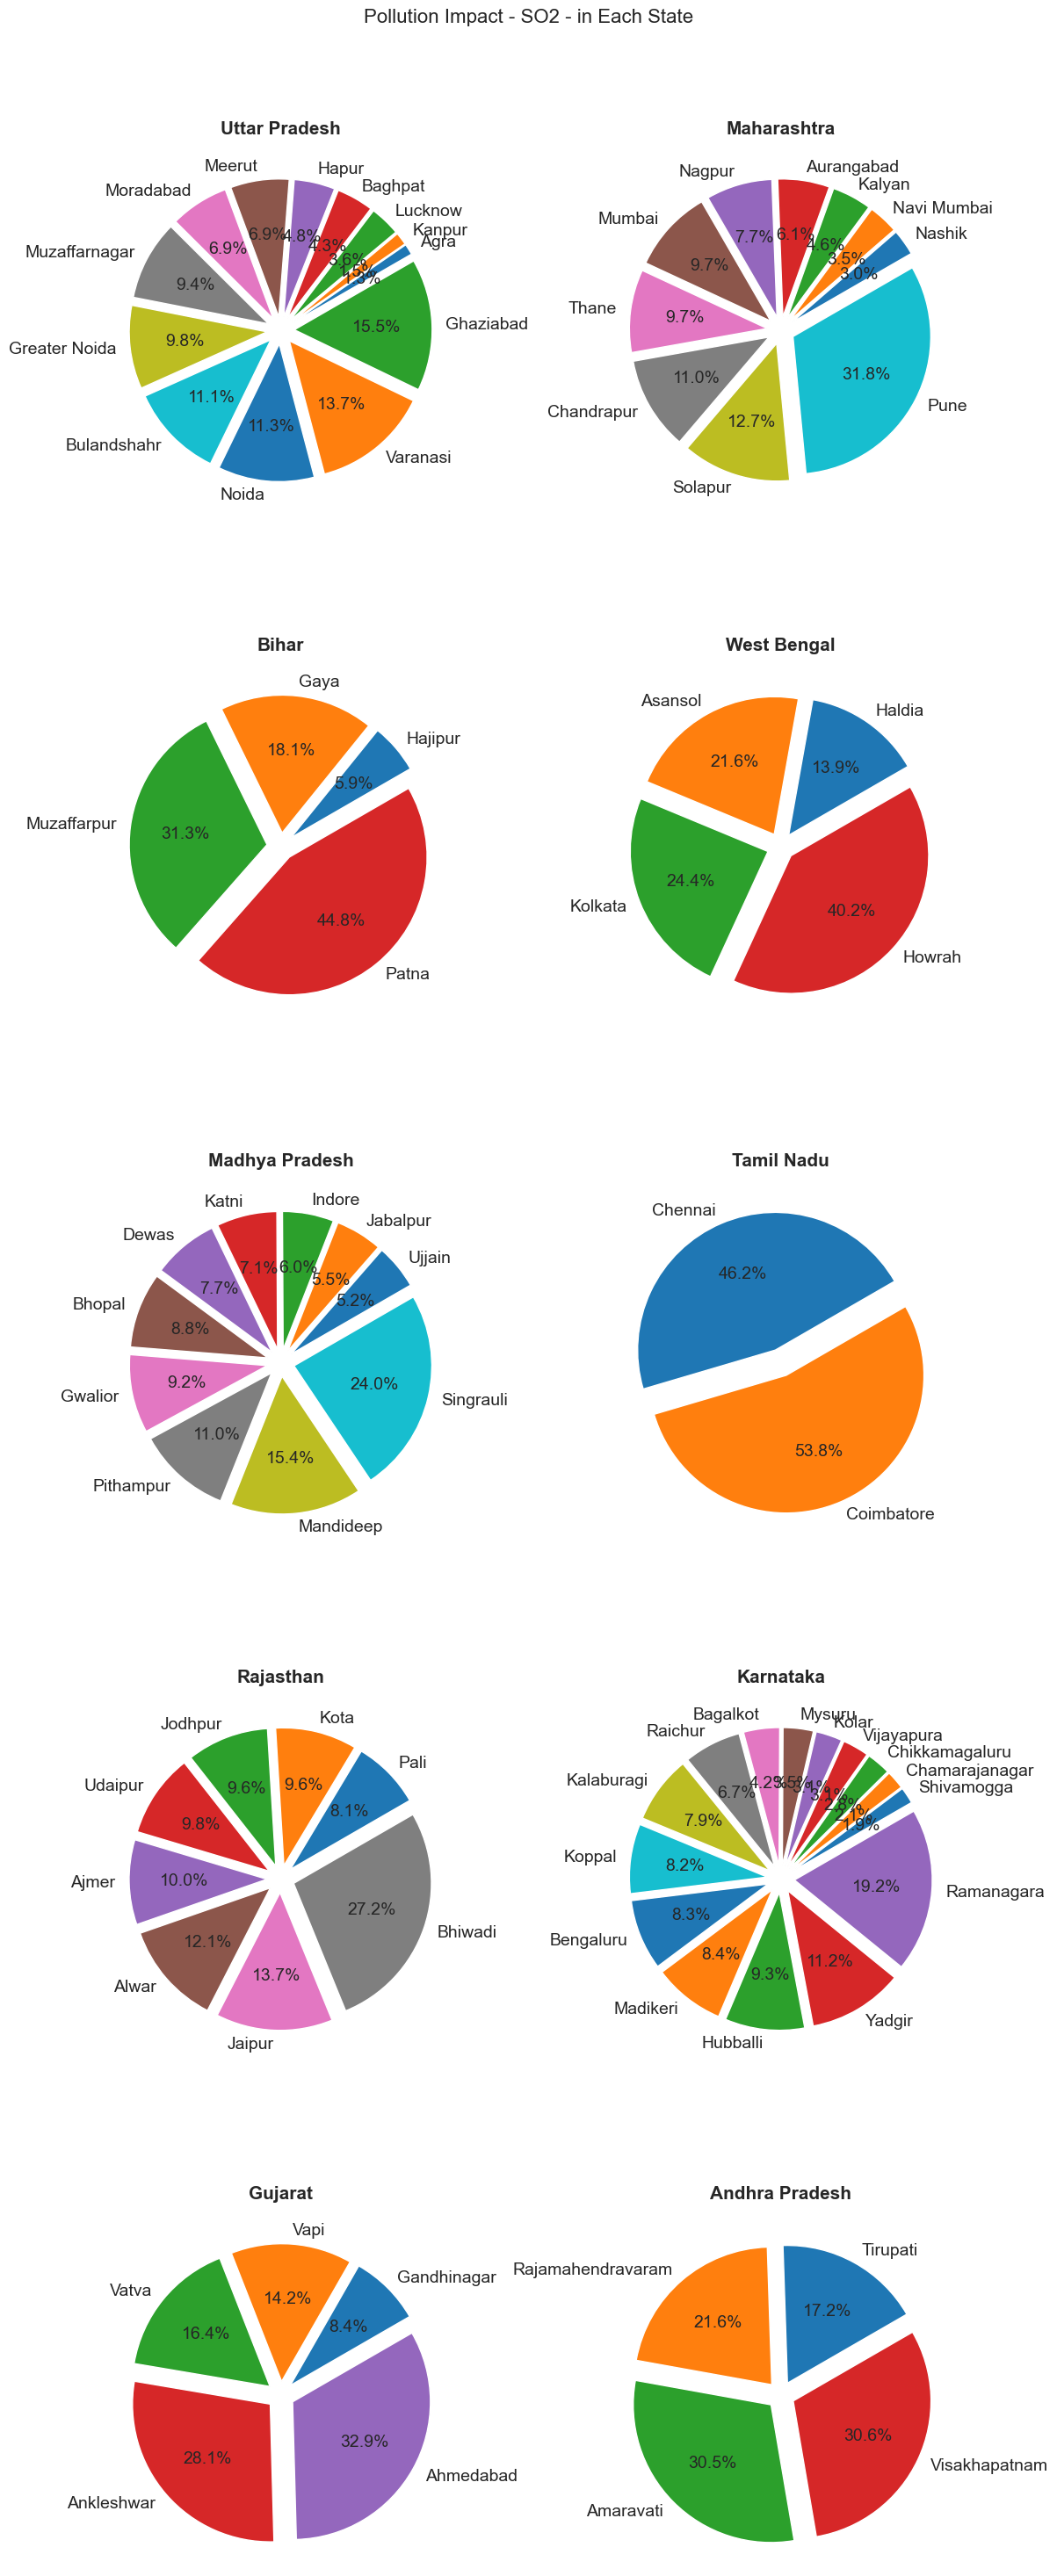

In [39]:
city_impact_pie_plot(master_data, 'SO2')

In [41]:
cities_of_interest = {
    'Uttar Pradesh': ['Ghaziabad', 'Varanasi', 'Noida'],
    'Maharashtra': ['Chandrapur', 'Pune', 'Solapur'],
    'Bihar': ['Patna', 'Muzaffarpur', 'Gaya'],
    'West Bengal': ['Howrah', 'Kolkata', 'Asansol'],
    'Madhya Pradesh': ['Singrauli', 'Ujjain', 'Jabalpur', 'Pithampur'],
    'Tamil Nadu': ['Chennai', 'Coimbatore'],
    'Rajasthan': ['Bhiwandi', 'Jodhpur', 'Jaipur'],
    'Karnataka': ['Bengaluru', 'Hubbali'],
    'Gujarat': ['Ahmedabad', 'Vatva', 'Ankhleshwar'],
    'Andhra Pradesh': ['Vishakapatnam', 'Rajamahendravaram']
}

# Create a new reduced master_data dictionary
reduced_master_data = {}

# Iterate over each state and city of interest and extract the corresponding dataframes
for state, cities in cities_of_interest.items():
    if state in master_data:
        reduced_master_data[state] = {}
        for city in cities:
            if city in master_data[state]:
                reduced_master_data[state][city] = master_data[state][city]

In [43]:
from sklearn.preprocessing import MinMaxScaler

def plot_distribution(reduced_master_data, feature_names):
    """
    Plot histograms for each feature on separate subplots for each state.

    Parameters:
    - reduced_master_data (dict): Nested dictionary containing the pollutant levels in the format {state: {city: dataframe}}
    - feature_names (list): List of feature names to plot histograms for
    """
    # Create a MinMaxScaler object
    scaler = MinMaxScaler(feature_range=(0, 1))

    # Define a custom color palette for the features
    color_palette = ['blue']

    # Calculate the number of rows and columns for subplots
    num_states = len(reduced_master_data)
    num_rows = 5
    num_cols = 2

    # Create subplots with adjusted positioning
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 18), sharey=False)
    fig.subplots_adjust(hspace=0.5)

    # Flatten the axes array
    axes = axes.flatten()

    # Iterate over each state in the reduced_master_data dictionary
    for i, (state, cities) in enumerate(reduced_master_data.items()):
        # Select the appropriate subplot
        ax = axes[i]

        # Iterate over each feature and its corresponding color
        for j, feature_name in enumerate(feature_names):
            # Initialize an empty list to store feature values for all cities in the state
            feature_values = []

            # Iterate over each city in the state and append its feature values to the list
            for city_data in cities.values():
                feature_values.extend(city_data[feature_name].tolist())

            # Scale the feature values between 0 and 1
#             scaled_values = scaler.fit_transform(np.array(feature_values).reshape(-1, 1))
            scaled_values = np.array(feature_values).reshape(-1, 1)

            # Plot the histogram using matplotlib directly with the specified color and transparent background
            ax.hist(scaled_values, bins=10, label=feature_name, color=color_palette[j % len(color_palette)],
                    alpha=0.7, edgecolor='black', linewidth=1.2, histtype='bar', fill=True, density=True)

        # Set the title for the subplot
        ax.set_title(state)

        # Set the x-axis label for the subplot
        ax.set_xlabel('PM2.5')

        # Set the y-axis label for the subplot
        ax.set_ylabel('Frequency')

        # Set legend
        ax.legend()

    # Hide any unused subplots
    for j in range(num_states, num_rows * num_cols):
        fig.delaxes(axes[j])

    # Adjust the spacing between subplots
    plt.tight_layout()
    fig.suptitle("Distribution of Pollutant Levels PM2.5 across all States", y=1.02, fontweight='bold')

    # Show the plot
    plt.show()

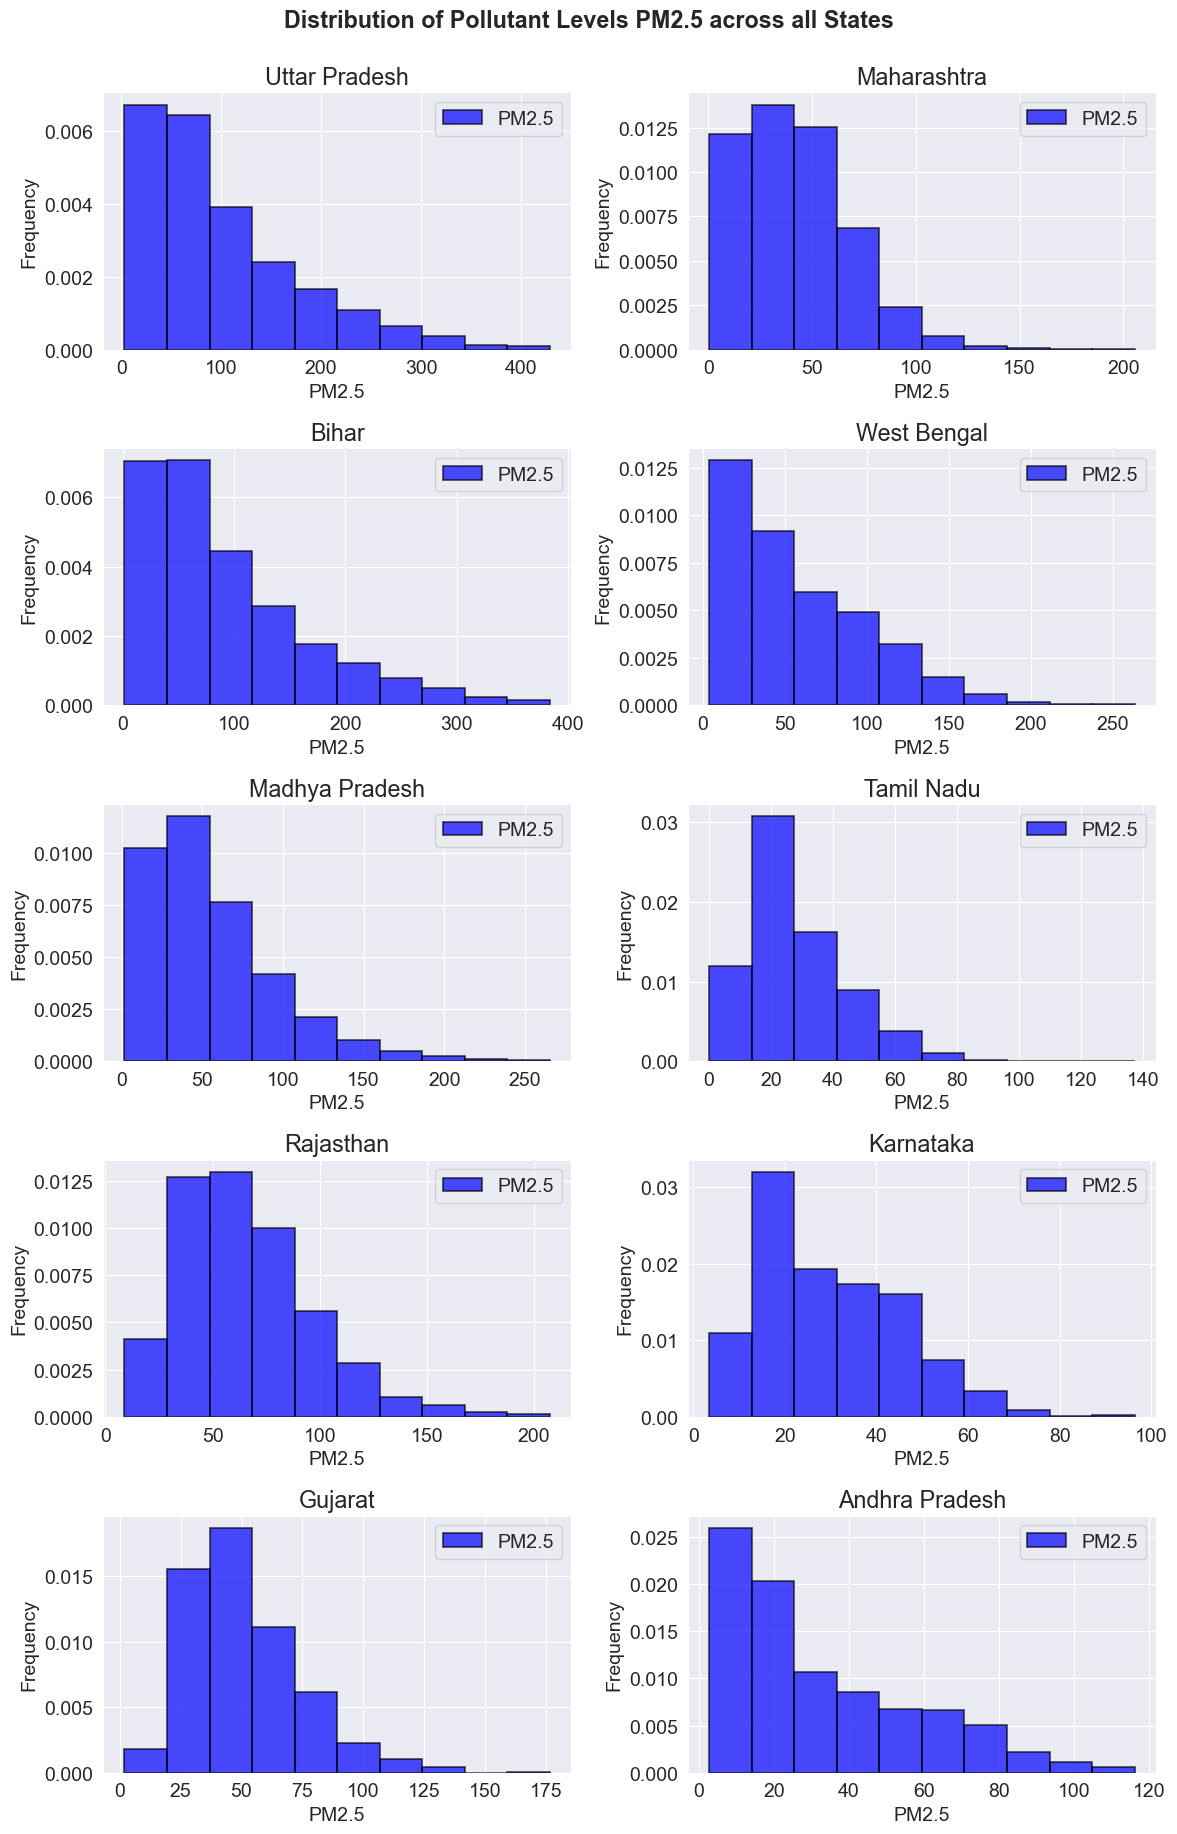

In [45]:
plot_distribution(reduced_master_data, ['PM2.5'])

In [47]:
def violin_plot_feature(reduced_master_data, feature_name):
    fig, ax = plt.subplots(figsize=(10, 6))

    data = []
    labels = []

    for state, cities in reduced_master_data.items():
        state_data = []
        for city, df in cities.items():
            state_data.extend(df[feature_name])

        data.append(state_data)
        labels.append(state)

    # Calculate the average values for each state
    average_values = [pd.Series(state_data).mean() for state_data in data]
    # Sort the data and labels based on the average values in descending order
    data_sorted, labels_sorted, average_values_sorted = zip(*sorted(zip(data, labels, average_values), key=lambda x: x[2], reverse=True))

    sns.violinplot(data=data_sorted, ax=ax)
    ax.set_xticks(range(len(labels_sorted)))
    ax.set_xticklabels(labels_sorted, rotation=90)
    ax.set_ylabel(feature_name)
    ax.set_title("Violin plot distribution of " + feature_name + " in each state")
    plt.tight_layout()
    plt.show()

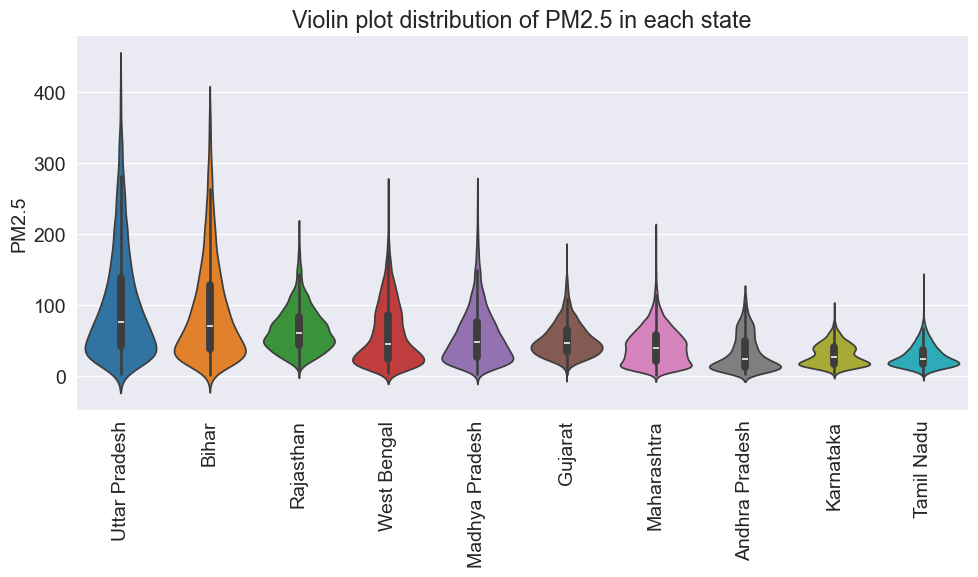

In [49]:
violin_plot_feature(reduced_master_data, 'PM2.5')

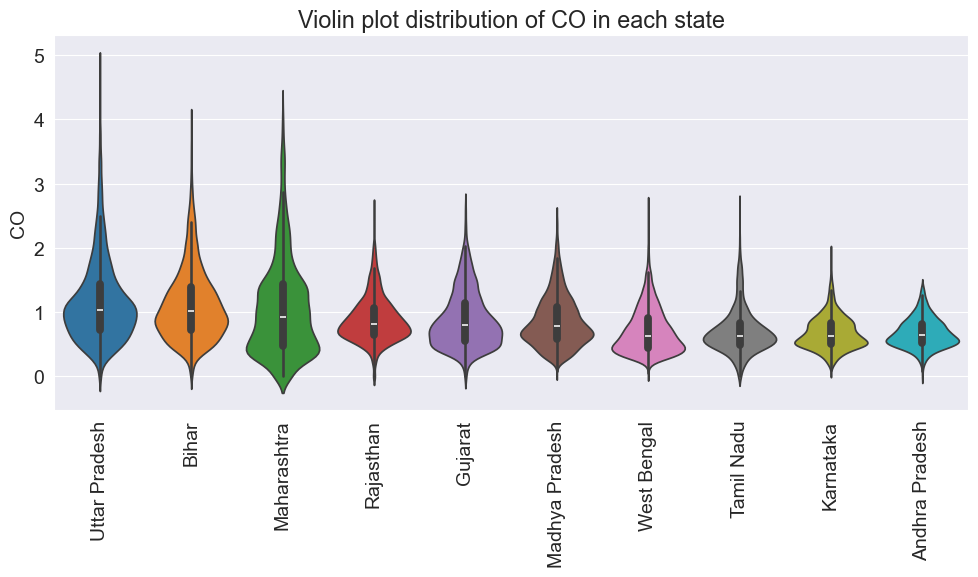

In [51]:
violin_plot_feature(reduced_master_data, 'CO')

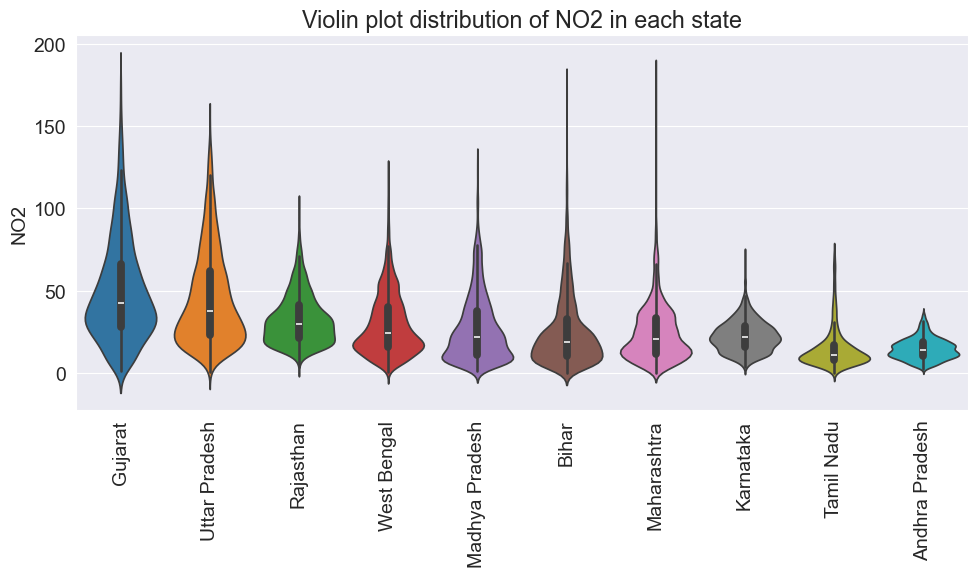

In [53]:
violin_plot_feature(reduced_master_data, 'NO2')

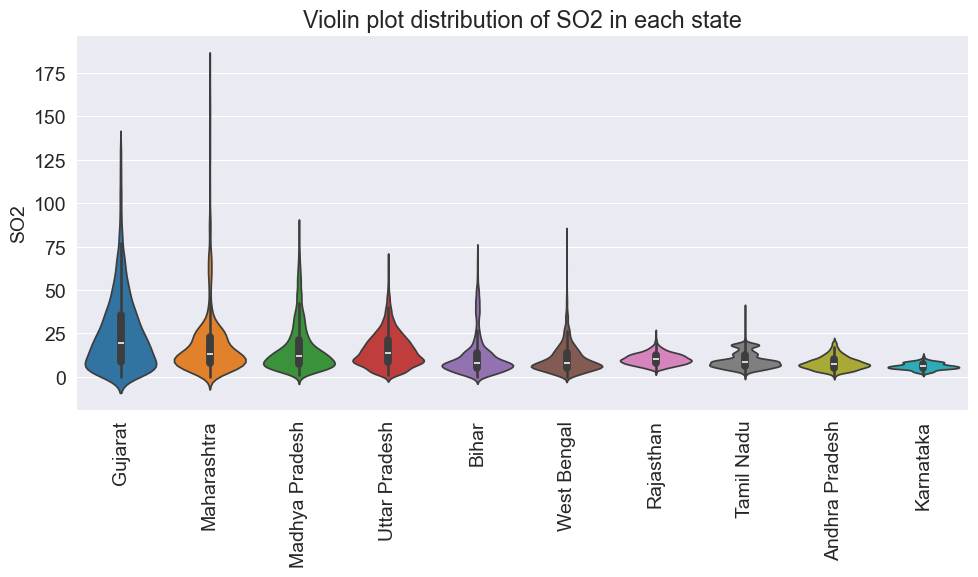

In [55]:
violin_plot_feature(reduced_master_data, 'SO2')

In [57]:
import calendar

def average_values_plot(reduced_master_data, feature_name, time_unit):
    fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))

    for i, (state, cities) in enumerate(reduced_master_data.items()):
        ax = axs[i // 2, i % 2]  # Access the correct subplot based on i
        for city, df in cities.items():
            if time_unit == 'year':
                df['Time'] = df['Date'].dt.year
            elif time_unit == 'month':
                df['Time'] = df['Date'].dt.month
            else:
                raise ValueError("Invalid time unit. Please choose either 'year' or 'month'.")
            average_feature = df.groupby('Time')[feature_name].mean().reset_index()
            if time_unit == 'month':
                average_feature['Time'] = average_feature['Time'].apply(lambda x: calendar.month_name[x])
            sns.lineplot(data=average_feature, x='Time', y=feature_name, label=city, ax=ax)

        # Set the title and labels for each subplot
        ax.set_title(state)
        ax.set_xlabel(time_unit.capitalize())
        ax.set_ylabel(f'Average {feature_name} Value')

        if time_unit == 'month':
            ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for month names

    # Set the overall title
    fig.suptitle(f'Average {feature_name} Values Throughout the {time_unit.capitalize()} for All States')

    # Show the legend outside the plot
    plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Display the plot
    plt.show()

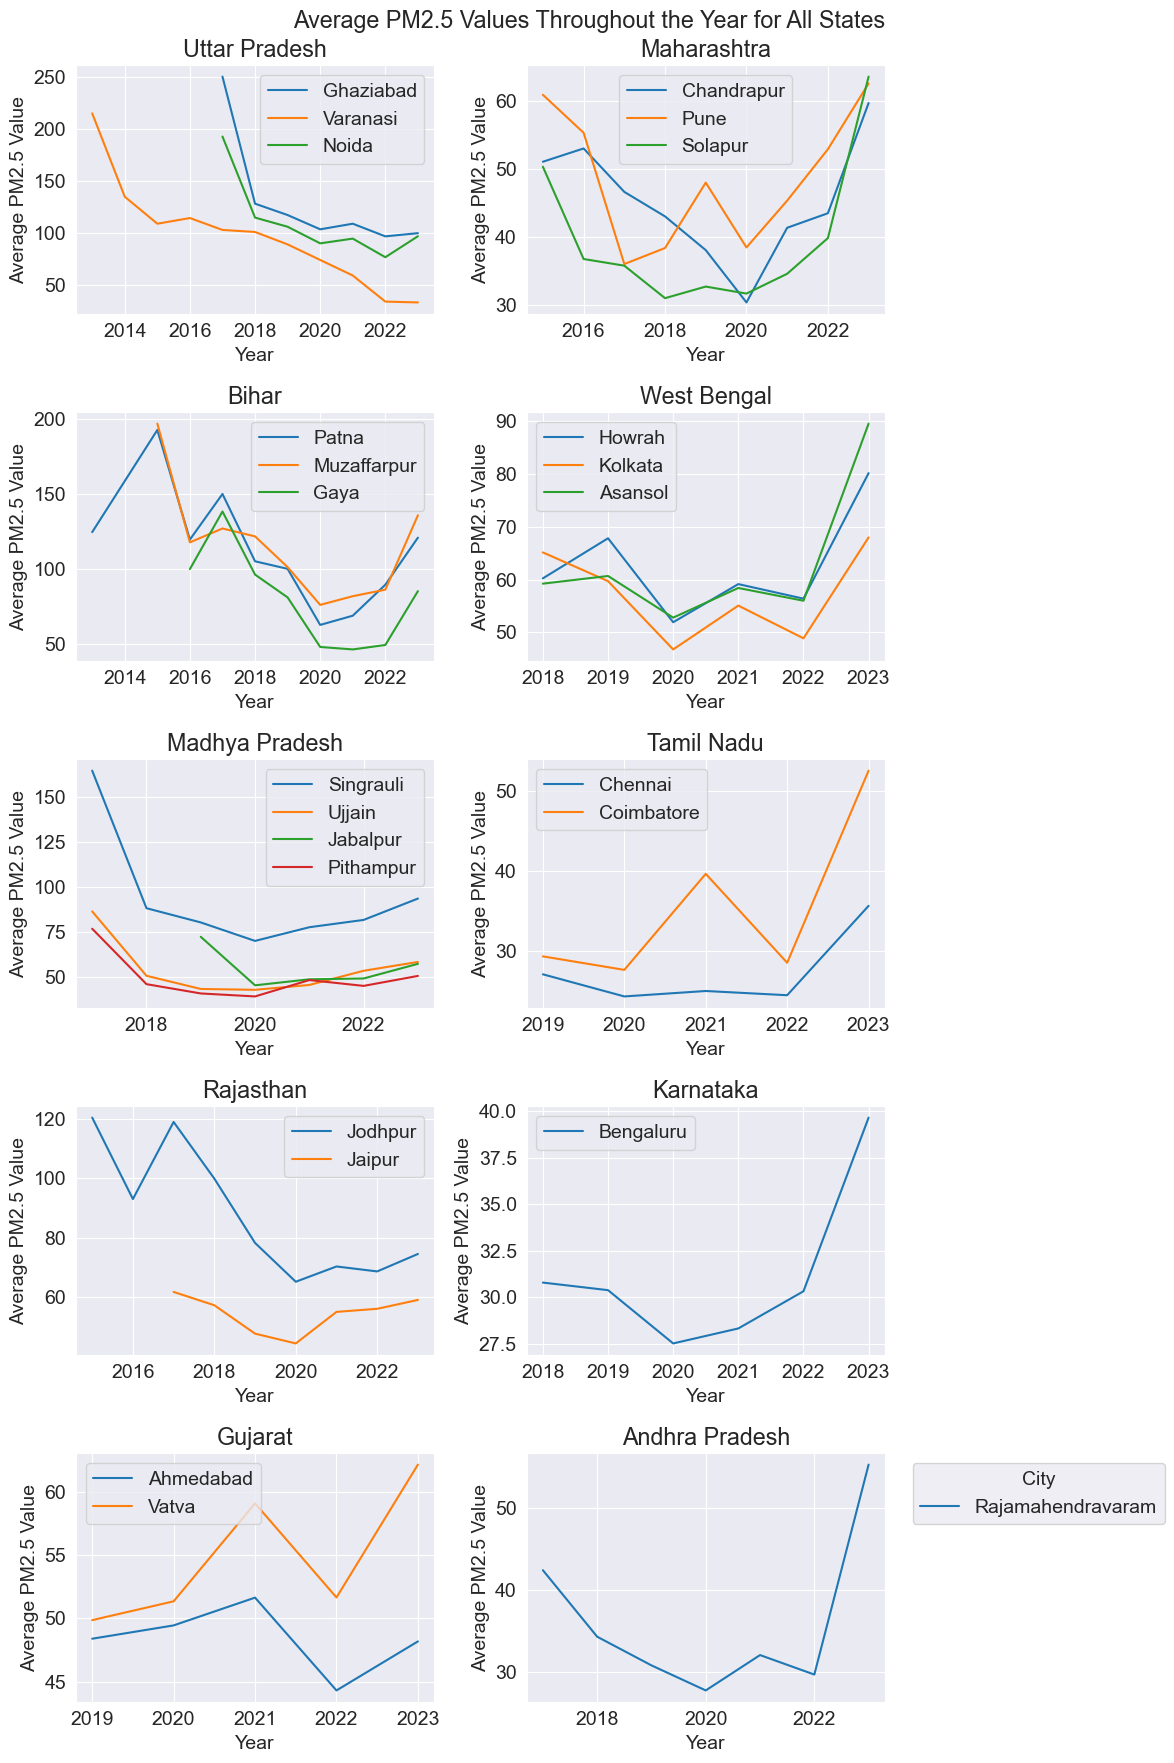

In [59]:
# average_values_plot(reduced_master_data, 'PM2.5', 'year')
average_values_plot(reduced_master_data, 'PM2.5', 'year')

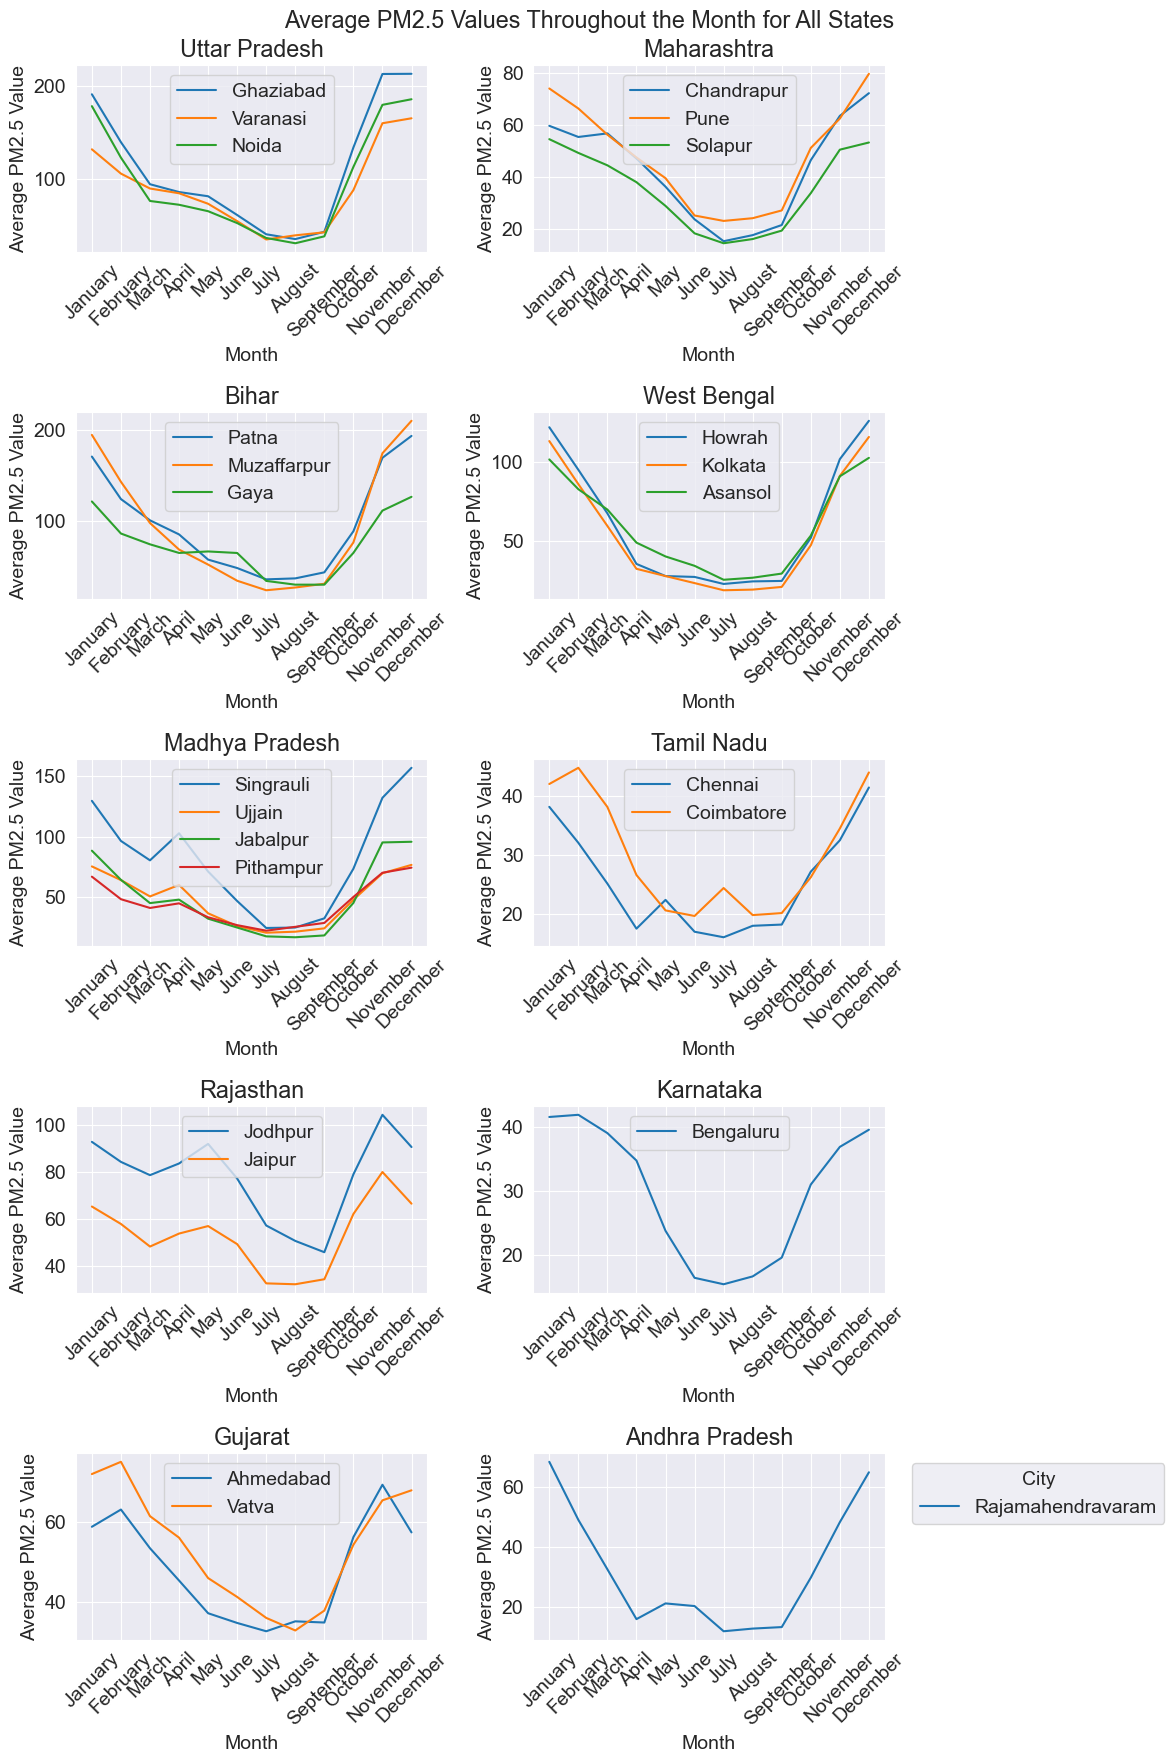

In [61]:
average_values_plot(reduced_master_data, 'PM2.5', 'month')

In [63]:
def correlation_heatmap(reduced_master_data):
    # Concatenate all city data into a single DataFrame
    all_data = pd.concat([pd.concat(cities.values()) for cities in reduced_master_data.values()])

    # Select the specific air quality parameters of interest
    air_quality_params = ['PM2.5', 'PM10','Ozone','CO', 'SO2', 'NO2']
    selected_data = all_data[air_quality_params]

    # Compute the correlation matrix
    corr_matrix = selected_data.corr()

    # Create a mask to visualize only the upper triangular part of the correlation matrix
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Create a diverging color map
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Create a heatmap with masked values
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap=cmap, square=True)

    # Set the title
    plt.title('Correlation Heatmap of Air Quality Parameters')

    # Display the plot
    plt.show()

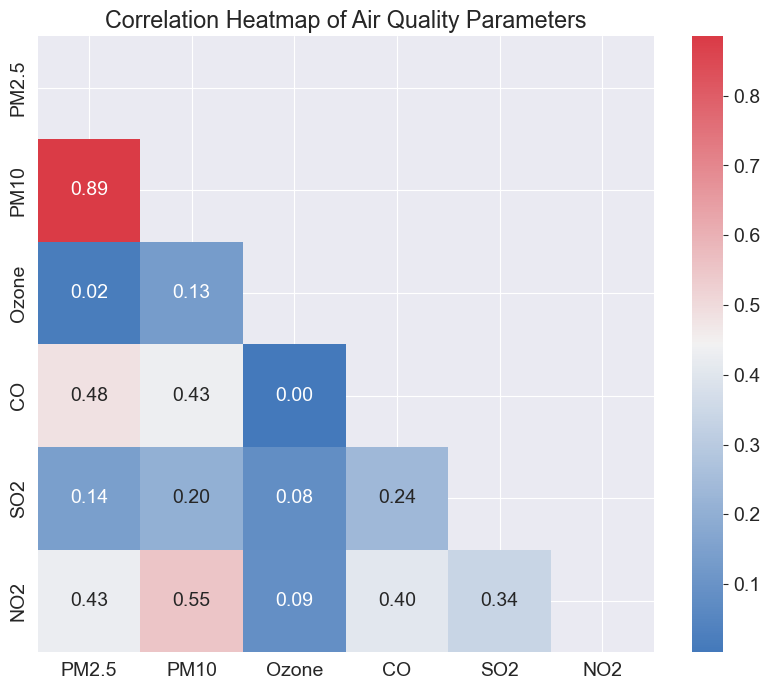

In [65]:
correlation_heatmap(reduced_master_data)

In [67]:
#### 1) What is the Air Quality Index (AQI) of each state?

In [69]:
def calculate_aqi(pm25_concentration):
    breakpoints = [0, 12, 35.4, 55.4, 150.4, 250.4, 350.4, 500.4]
    aqi_values = [0, 50, 100, 150, 200, 300, 400, 500]

    aqi = np.zeros_like(pm25_concentration)  # Initialize AQI array

    for i, pm25 in enumerate(pm25_concentration):
        pm25 = np.clip(pm25, breakpoints[0], breakpoints[-1])
        index = np.searchsorted(breakpoints, pm25)

        if index == 0:
            aqi[i] = 0
        elif index == len(breakpoints):
            aqi[i] = 500
        else:
            bp_low, bp_high = breakpoints[index - 1], breakpoints[index]
            aqi_low, aqi_high = aqi_values[index - 1], aqi_values[index]
            aqi[i] = ((aqi_high - aqi_low) / (bp_high - bp_low)) * (pm25 - bp_low) + aqi_low

    return aqi

def calculate_aqi_for_state(state_data):
    pollutant_data = state_data.values()  # Assuming the pollutant data is stored as values in the state_data dictionary
    aqi_values = []

    for pollutant in pollutant_data:
        if 'PM2.5' in pollutant:  # Calculate AQI for PM2.5
            pm25_concentration = pollutant['PM2.5']
            aqi = calculate_aqi(pm25_concentration)
            aqi_values.extend(aqi)

    state_aqi = round(np.max(aqi_values))  # Use the maximum AQI value among all pollutants for the state

    return state_aqi

state_aqi_values = {}

# Iterate over the reduced_master_data dictionary
for state, cities in reduced_master_data.items():
    state_aqi = calculate_aqi_for_state(cities)
    state_aqi_values[state] = state_aqi

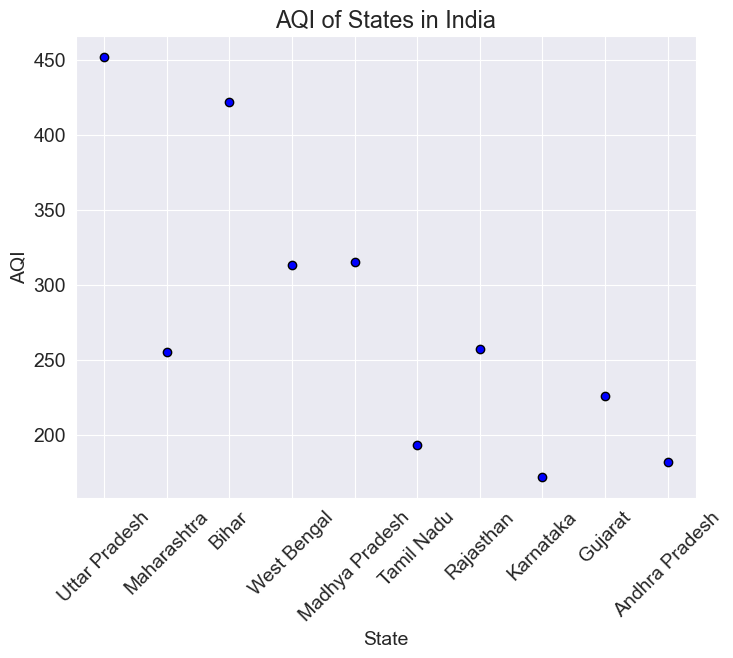

In [71]:
state_names = list(state_aqi_values.keys())
population = list(state_aqi_values.values())

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(state_names, population, c='blue', edgecolors='black')

# Set the axis labels and title
plt.xlabel('State')
plt.ylabel('AQI')
plt.title('AQI of States in India')

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [73]:
# Print the AQI values for each state
for state, aqi in state_aqi_values.items():
    print(f"State: {state}, AQI: {aqi}")

State: Uttar Pradesh, AQI: 452
State: Maharashtra, AQI: 255
State: Bihar, AQI: 422
State: West Bengal, AQI: 313
State: Madhya Pradesh, AQI: 315
State: Tamil Nadu, AQI: 193
State: Rajasthan, AQI: 257
State: Karnataka, AQI: 172
State: Gujarat, AQI: 226
State: Andhra Pradesh, AQI: 182


In [75]:
### 2) Which state has best air quality index and which state has the worst?

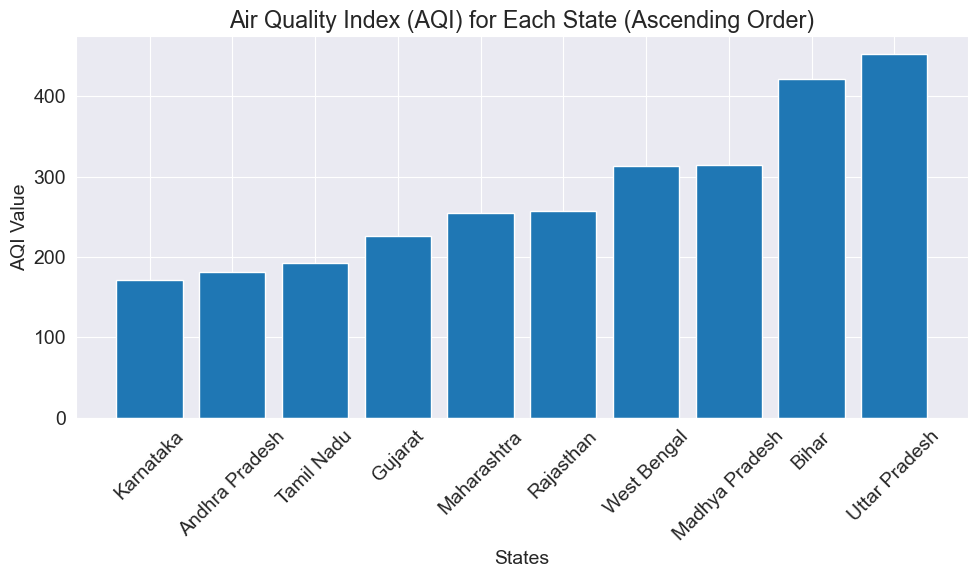

In [77]:
# Sort the state_aqi_values dictionary by values in ascending order
sorted_states = sorted(state_aqi_values, key=state_aqi_values.get)

# Extract the sorted states and corresponding AQI values
states = [state for state in sorted_states]
aqi_values = [state_aqi_values[state] for state in sorted_states]

# Plot the AQI values as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(states, aqi_values)

# Add labels and title
plt.xlabel('States')
plt.ylabel('AQI Value')
plt.title('Air Quality Index (AQI) for Each State (Ascending Order)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [79]:
#3) Does AQI trend with population of the state?

In [81]:
aqi_pop_dict = {"State": ['Uttar Pradesh', 'Maharashtra', 'Bihar', 'West Bengal', 'Madhya Pradesh', 'Tamil Nadu', 
         'Rajasthan', 'Karnataka', 'Gujarat', 'Andhra Pradesh'],
               "Population":[199812341, 112372972, 103804637, 91347736, 72597565, 72138956, 68621012, 61130704, 60383628, 49286799],
               "AQI": [452,255,422,313,315,193,257,172,226,166]}
aqi_pop_df = pd.DataFrame(aqi_pop_dict)
aqi_pop_df

State  Population  AQI
0   Uttar Pradesh   199812341  452
1     Maharashtra   112372972  255
2           Bihar   103804637  422
3     West Bengal    91347736  313
4  Madhya Pradesh    72597565  315
5      Tamil Nadu    72138956  193
6       Rajasthan    68621012  257
7       Karnataka    61130704  172
8         Gujarat    60383628  226
9  Andhra Pradesh    49286799  166

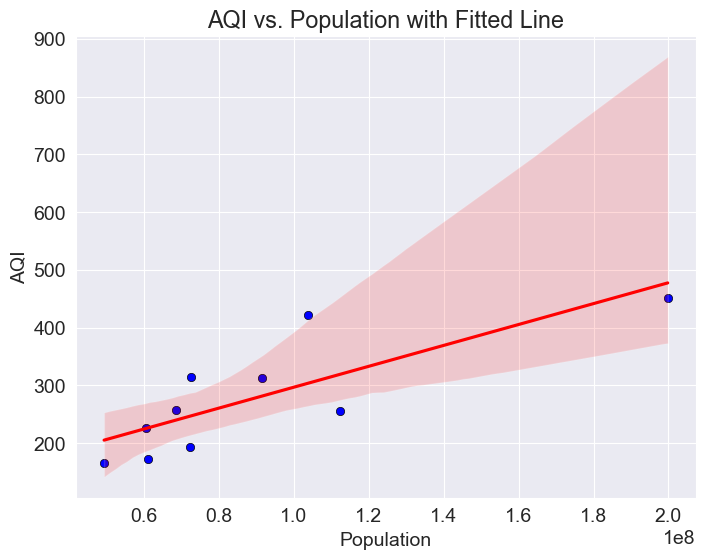

Root Mean Squared Error (MSE): 56.57151430207048


In [83]:
# Scatter plot of AQI vs. Population
plt.figure(figsize=(8, 6))
sns.scatterplot(data=aqi_pop_df, x='Population', y='AQI', color='blue', edgecolor='black')

# Fit a line to the scatter plot
sns.regplot(data=aqi_pop_df, x='Population', y='AQI', color='red', scatter=False)

# Calculate residuals
predicted_aqi = np.polyval(np.polyfit(aqi_pop_df['Population'], aqi_pop_df['AQI'], 1), aqi_pop_df['Population'])
residuals = aqi_pop_df['AQI'] - predicted_aqi

# Set the axis labels and title
plt.xlabel('Population')
plt.ylabel('AQI')
plt.title('AQI vs. Population with Fitted Line')

# Show the plot
plt.show()

# Calculate the mean squared error (MSE) of the fit
rmse = np.sqrt(np.mean(residuals**2))
print("Root Mean Squared Error (MSE):", rmse)

In [85]:
correlation = aqi_pop_df['Population'].corr(aqi_pop_df['AQI'])
correlation_percentage = correlation**2 * 100
print("Correlation between Population and AQI:", correlation_percentage)

Correlation between Population and AQI: 63.74661740014248


In [87]:
### 4) What is the correlation between the different pollutants? What could be the reason for the strong/weak correlation?

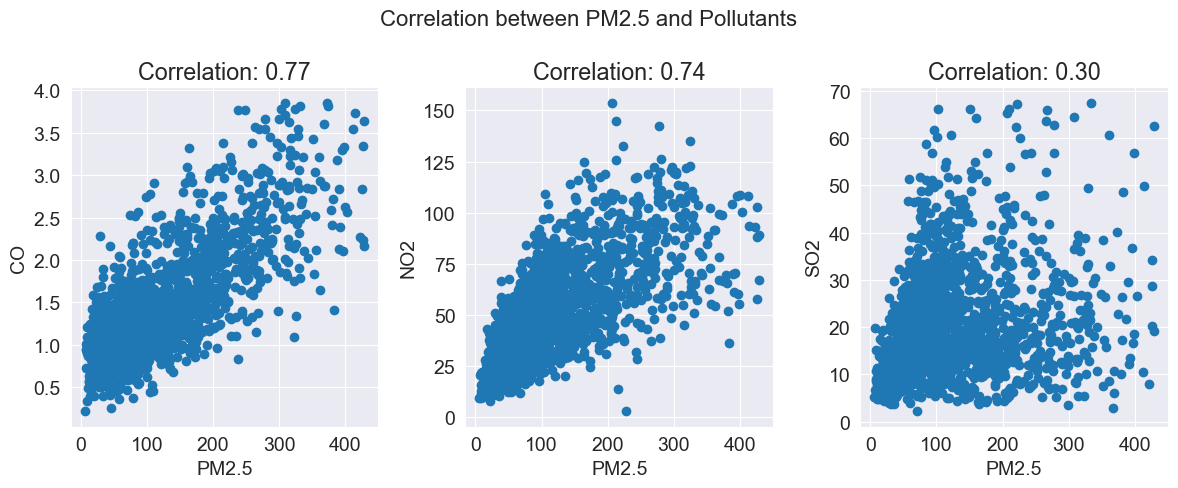

In [89]:
def plot_scatter_with_correlation():
    pollutants = ['CO', 'NO2', 'SO2']
    fig, axes = plt.subplots(1,3, figsize=(12, 5))
    fig.suptitle('Correlation between PM2.5 and Pollutants', fontsize=16)
    axes = axes.flatten()

    for i, pollutant in enumerate(pollutants):
        feature1_values = []
        feature2_values = []
        for cities in reduced_master_data.values():
            for data in cities.values():
                value1 = data['PM2.5']
                value2 = data[pollutant]
                feature1_values.append([val for val in value1])
                feature2_values.append([val for val in value2])

        # Calculate correlation
        correlation = np.corrcoef(feature1_values[0], feature2_values[0])[0, 1]
        axes[i].scatter(feature1_values[0], feature2_values[0])
        axes[i].set_xlabel('PM2.5')
        axes[i].set_ylabel(pollutant)
        axes[i].set_title(f'Correlation: {correlation:.2f}')
        axes[i].grid(True)

    # Remove empty subplot if there are fewer than 4 pollutants
    if len(pollutants) < 3:
        fig.delaxes(axes[-1])

    plt.tight_layout()
    plt.show()

plot_scatter_with_correlation()

In [91]:
def plot_cities_increasing_order(reduced_data, pollutant):
    city_levels = []

    for state, cities in reduced_data.items():
        for city, data in cities.items():
            max_level = data[pollutant].max()
            city_levels.append((city, max_level))

    city_levels.sort(key=lambda x: x[1])  # Sort the city levels by increasing pollutant value
    cities = [city for city, _ in city_levels]
    levels = [level for _, level in city_levels]

    fig, ax = plt.subplots(figsize=(10, 6))
    fig.suptitle(f'{pollutant} Levels in Cities (Increasing Order)', fontsize=16)

    sns.barplot(x=levels, y=cities, ax=ax)
    ax.set_xlabel(pollutant)
    ax.set_ylabel('Cities')
    ax.grid(True)
    ax.tick_params(axis='y', rotation=0)

    plt.tight_layout()
    plt.show()

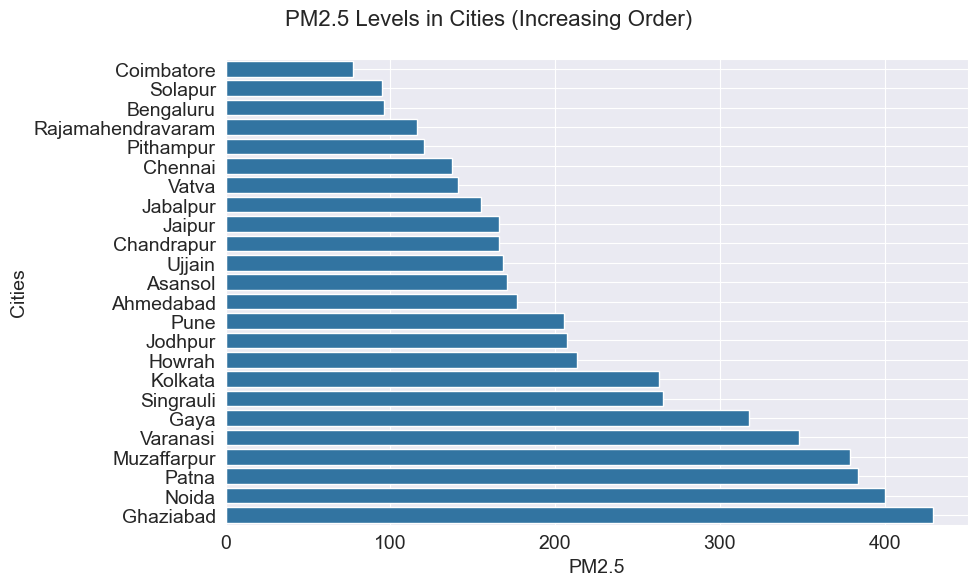

In [93]:
pollutants = 'PM2.5'
plot_cities_increasing_order(reduced_master_data, pollutants)

In [95]:
### 6) What is the rank of cities with respect to SO2 pollution?

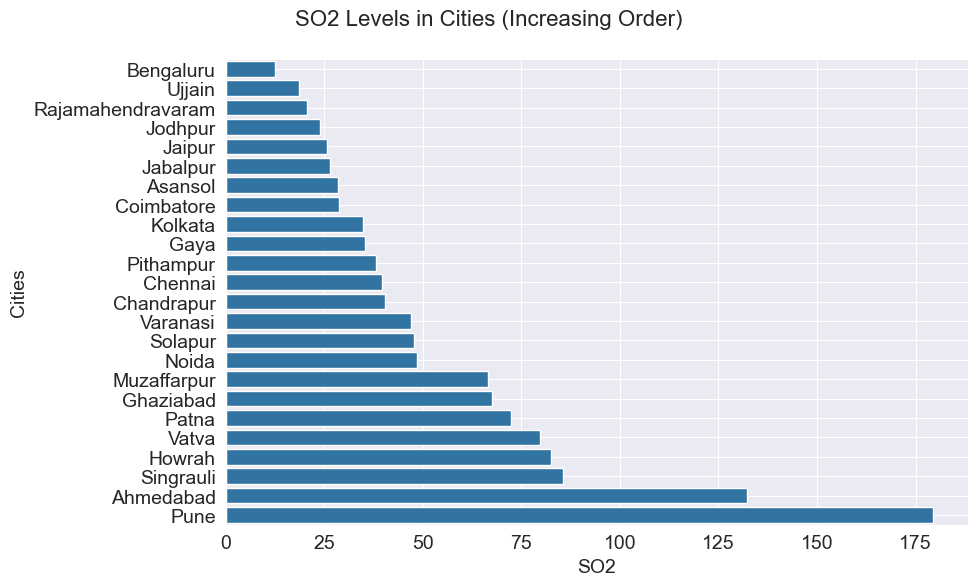

In [97]:
pollutant = 'SO2'
plot_cities_increasing_order(reduced_master_data, pollutant)

In [106]:
### 9) What is the severity of pollution in all the states?

/var/folders/lj/7g8hry1d24lg92fg6g_kwcb80000gn/T/ipykernel_1934/3947597813.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=state_data, order=state_data[column].value_counts().index, ax=ax, palette=color_palette)
/var/folders/lj/7g8hry1d24lg92fg6g_kwcb80000gn/T/ipykernel_1934/3947597813.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=state_data, order=state_data[column].value_counts().index, ax=ax, palette=color_palette)
/var/folders/lj/7g8hry1d24lg92fg6g_kwcb80000gn/T/ipykernel_1934/3947597813.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `l

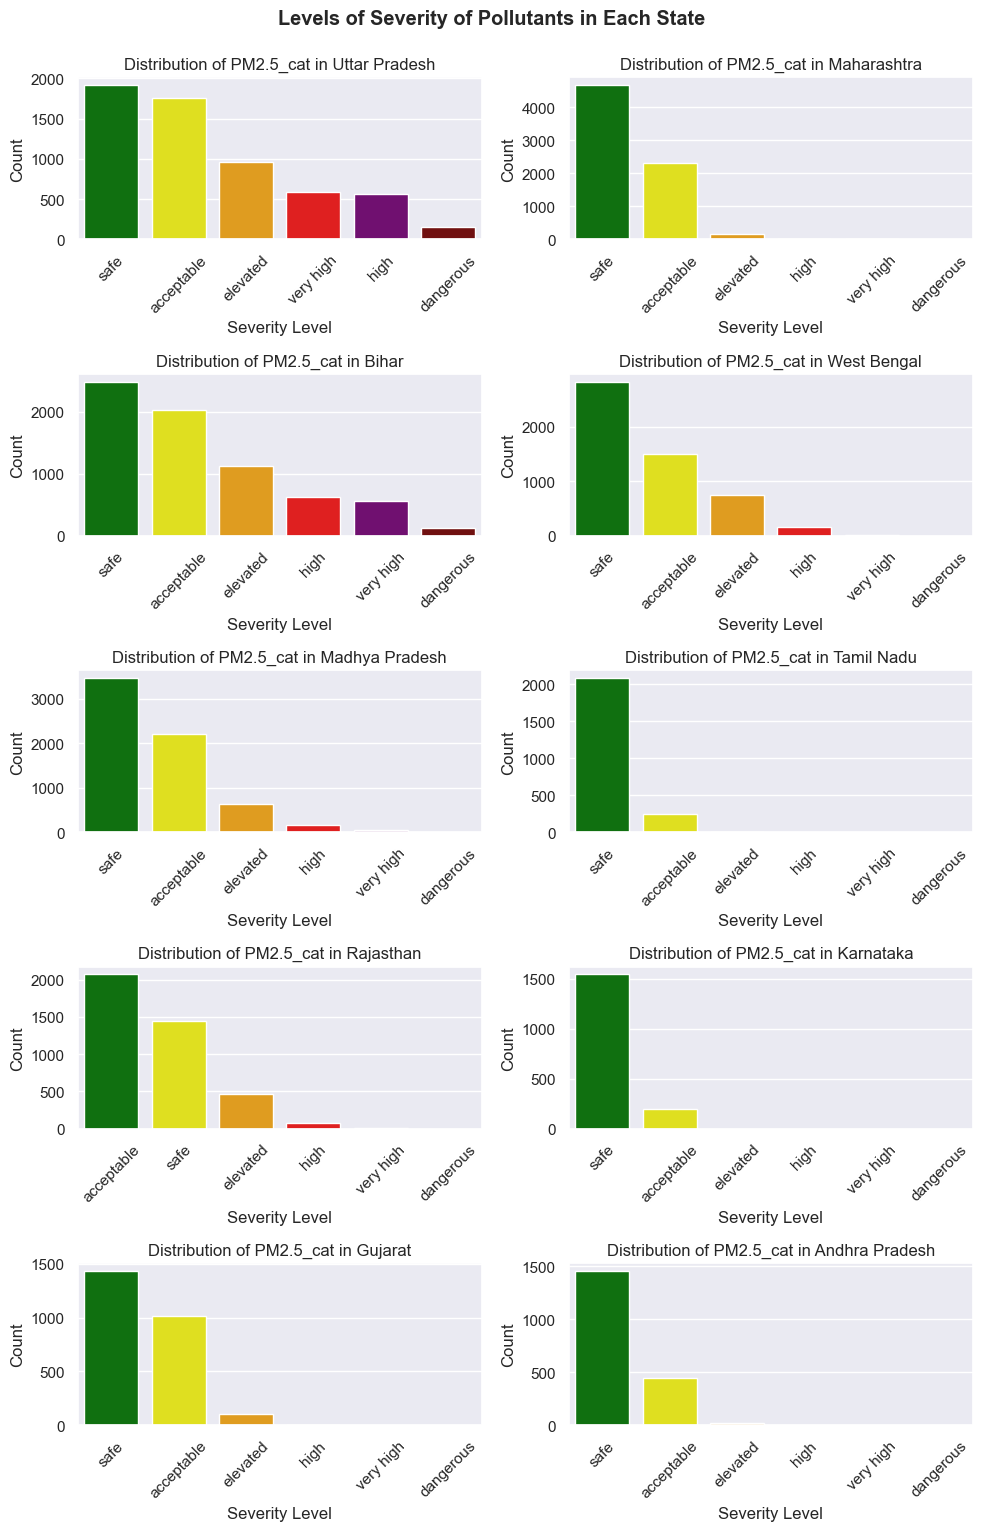

In [108]:
color_palette = ['green', 'yellow', 'orange', 'red', 'purple', 'maroon']

# Assuming you have a nested dictionary named 'reduced_master_data' containing the categorized pollutant levels
sns.set(style="darkgrid")

# Get the number of states
num_states = len(reduced_master_data)

# Calculate the number of rows and columns for subplots
num_rows = 5
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over the states
for i, (state, city_data) in enumerate(reduced_master_data.items()):
    # Concatenate the data from all cities within the state
    state_data = pd.concat(city_data.values())
    
    # Select the columns representing pollutant severity levels
    severity_columns = ['PM2.5_cat']
    
    # Plot the distribution of pollutant severity levels for the current state
    for column in severity_columns:
        ax = axes[i]  # Select the appropriate subplot
        sns.countplot(x=column, data=state_data, order=state_data[column].value_counts().index, ax=ax, palette=color_palette)
        ax.set_title(f"Distribution of {column} in {state}")
        ax.set_xlabel("Severity Level")
        ax.set_ylabel("Count")
        ax.tick_params(axis='x', rotation=45)
        ax.yaxis.grid(True)

# Hide any unused subplots
for j in range(num_states, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()
fig.suptitle("Levels of Severity of Pollutants in Each State", fontweight = "bold", y = 1.02)
# Show the plot
plt.show()

In [110]:
### 10a) How do the levels of pollutants trends with year? 

In [112]:
def average_values_plot(reduced_master_data, feature_name, time_unit):
    fig, ax = plt.subplots(figsize=(12, 8))

    for state, cities in reduced_master_data.items():
        state_average = pd.DataFrame()
        for city, df in cities.items():
            if time_unit == 'year':
                df['Time'] = df['Date'].dt.year
            elif time_unit == 'month':
                df['Time'] = df['Date'].dt.month
            else:
                raise ValueError("Invalid time unit. Please choose either 'year' or 'month'.")
            average_feature = df.groupby('Time')[feature_name].mean().reset_index()
            state_average = pd.concat([state_average, average_feature], ignore_index=True)

        if time_unit == 'month':
            state_average['Time'] = state_average['Time'].apply(lambda x: calendar.month_name[x])
        sns.lineplot(data=state_average, x='Time', y=feature_name, label=state, ax=ax)

    # Set the title and labels
    ax.set_title(f'Average {feature_name} Values Throughout the {time_unit.capitalize()}')
    ax.set_xlabel(time_unit.capitalize())
    ax.set_ylabel(f'Average {feature_name} Value')

    if time_unit == 'month':
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for month names

    # Show the legend
    ax.legend(title='State')

    # Adjust the spacing
    fig.tight_layout()

    # Display the plot
    plt.show()

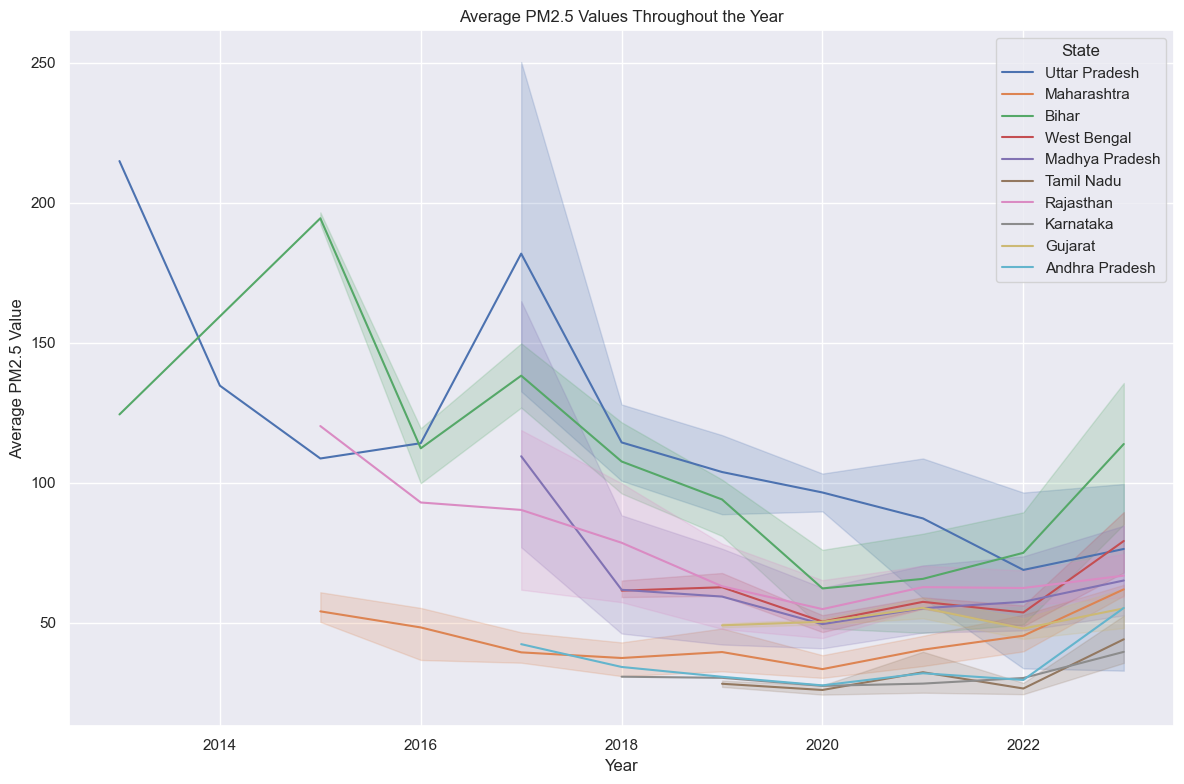

In [114]:
average_values_plot(reduced_master_data, 'PM2.5', 'year')

In [116]:
### 10b) How do the levels of pollutants trends with month?

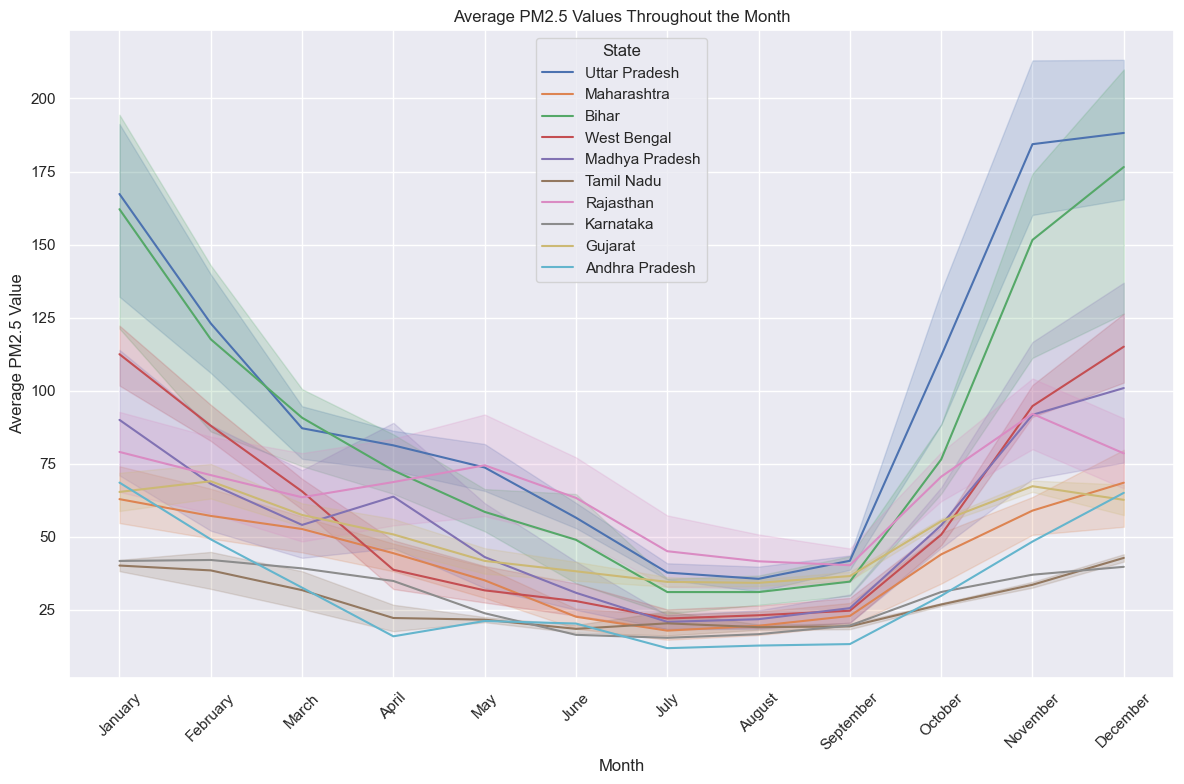

In [118]:
average_values_plot(reduced_master_data, 'PM2.5', 'month')